In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.rcParams.update(plt.rcParamsDefault)
#matplotlib.rcParams['mathtext.fontset'] = 'cm'
#matplotlib.rcParams['font.family'] = 'STIXGeneral'

#Direct input
#plt.rcParams['text.latex.preamble']=[r"\usepackage{lmodern}"]
#Options

tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "axes.titlesize":10
}
plt.rcParams.update(tex_fonts)

# font is  \OT1/cmr/m/n/10.95
#matplotlib.rcParams['font.serif'] = ['Courier']

# textwidth in latex in inches
TEXTWIDTH = 5.7885

plt.rcParams['xtick.major.pad']='1.5'
plt.rcParams['ytick.major.pad']='1'

In [3]:
def compute_mean_std(y_data):
    """
    Plots the average over all ys as bold line and standart deviation as shaded area
    Each entry in y_array list will become one line
    :param y_data: data to take mean and std of
    """
    mean = np.mean(y_data, axis=0)
    std = np.std(y_data, axis=0)

    return mean, std


In [4]:
def gather_data(path, x, idx):
    """
    Gather data, to the corresponding x-data until idx
    """
    y_data_returns = np.zeros((len(path), x.shape[0]))
    y_data_succ = np.zeros((len(path), x.shape[0]))

    for i in range(len(path)):
        data = np.load(path[i], mmap_mode='r')
        #for k in data.keys():
        #    print(f" key = {k}\n {data[k]}")

        # take mean over 10 eval episodes of one run
        returns = data["results"][idx]
        success_rate = data["successes"][idx]
        #ep_lengths = data["ep_lengths"][idx]
        #success_rate = returns.copy()
        #success_rate[np.where(returns > 0)] = 1
        #success_rate[np.where(returns < 0)] = -1

        mean_return = np.sum(returns, axis=1) / data["results"].shape[1] # average over number of eval episodes
        success_rate = np.sum(success_rate, axis=1) / data["successes"].shape[1] # average over number of eval episodes

        # gather values of different runs
        y_data_returns[i] = mean_return
        y_data_succ[i] = success_rate

    return y_data_returns, y_data_succ


In [5]:
change = np.array([146,
988,
1479,
1499,
1571,
4113,
4593,
4968,
5857,
5890,
6330,
7104,
7846,
8515,
8705,
9343,
9537,
9588,
10295,
10620,
10936,
11300,
11416,
11756,
11939,
12300,
12929,
13851,
13920,
14294,
14329,
3743,
17892,
19438,
20408,
24352,
26154,
28114,
28632,
29277,
29329,
30300,
30415,
32100,
32174,
33401,
33598,
34371,
34972,
35001,
36200,
37249,
37705,
37713,
38494,
39708,
41091,
41566,
41585,
41687,
41699,
42018,
42350,
42826,
42861,
43166,
44515,
11950,
47118,
47165,
51064,
53606,
53699,
54306,
15091,
15854,
54758,
55119,
55579,
55590,
55747,
56061,
56072,
57273,
57579,
58042,
16171,
16633,
16799,
63151,
63325,
64238,
64396,
64403,
16962,
18167,
65455,
65882,
66207,
68448,
68915,
18338,
18346,
18510,
70417,
70879,
71239,
72146,
72451,
73954,
74072,
74239,
77976,
79177,
80082,
83517,
84282,
84587,
89065,
89540,
89994,
90597,
90674,
91429,
91589,
92492,
93712,
93872,
26421,
94326,
96569,
97330,
98533,
99136,
27470,
100092,
100286,
102239,
103893,
105546,
105597,
105767,
105783,
106412,
108804,
110118,
111169,
112076,
112130,
112882,
113729,
113761,
114222,
119230,
119536,
120375,
121136,
122502,
122808,
123872,
34482,
34498,
34802,
34810,
124480,
124787,
125472,
128615,
128666,
128683,
128996,
130374,
130408,
131313,
131480,
132092,
132101,
132256,
132339,
132495,
132805,
133114,
133123,
133151,
133310,
133465,
36606,
37077,
37383,
134366,
136187,
138583,
141146,
142205,
142514,
142677,
143148,
143159,
144821,
145029,
146681,
148332,
148498,
40373,
40828,
149401,
151658,
151828,
152793,
153411,
153732,
154042,
154199,
155251,
155656,
156092,
156139,
156171,
156334,
157138,
157452,
157611,
157915,
158384,
43228,
43681,
158866,
159625,
160081,
160087,
160782,
45033,
163746,
165997,
166012,
166176,
166183,
166729,
167364,
167679,
45961,
169330,
169368,
169534,
169697,
170300,
170458,
173159,
47011,
47772,
174660,
174667,
174844,
175748,
176210,
176975,
179178,
179347,
179554,
180018,
180978,
181616,
181922,
182687,
183011,
183550,
49721,
50480,
184169,
184594,
184624,
184956,
185003,
185161,
185335,
185347,
185513,
185680,
186458,
186469,
186520,
186703,
187755,
188213,
51096,
51108,
188685,
189746,
191109,
191278,
191925,
192233,
192540,
192558,
192919,
52312,
52345,
52807,
193530,
194144,
194756,
194780,
195241,
195412,
196168,
196621,
196786,
197124,
198038,
54463,
198645,
199412,
200312,
200473,
202438,
203349,
203416,
55364,
55826,
203597,
205851,
206165,
206475,
206488,
207243,
208147,
55831,
56288,
56303,
56614,
209058,
209080,
209842,
209999,
210304,
211501,
57225,
57535,
214043,
214505,
214663,
216016,
216024,
216044,
216256,
216642,
216804,
216815,
217718,
218023,
218031,
58008,
58326,
58484,
218783,
219466,
219624,
219782,
220062,
220223,
220684,
221291,
59693,
60001,
223258,
224180,
224787,
224963,
225185,
225196,
225522,
225692,
226013,
226037,
226205,
227260,
227428,
227746,
60317,
61075,
230293,
231062,
231076,
231395,
232896,
62295,
62304,
62462,
62469,
233804,
233841,
233864,
234766,
235092,
235172,
237577,
62483,
62943,
63107,
63274,
238789,
239391,
239577,
239888,
240199,
240366,
240381,
240389,
241194,
241654,
241819,
241984,
242085,
242421,
242437,
243045,
63440,
63900,
243357,
243367,
243980,
243987,
244298,
244457,
244468,
245220,
245533,
245992,
246000,
246456,
247207,
247229,
247236,
247396,
247850,
64801,
65106,
65115,
248199,
250026,
250188,
250197,
251998,
252008,
252015,
252768,
252847,
66171,
253494,
253506,
253661,
253670,
253965,
254003,
254167,
257903,
258214,
258371,
259068,
259568,
259578,
259884,
259892,
260496,
261701,
262460,
262469,
262625,
262869,
262884,
68573,
69775,
263058,
263991,
264312,
264958,
265876,
265883,
266043,
266373,
266978,
267580,
267738,
69940,
69948,
70112,
70567,
268938,
269246,
269517,
269972,
269981,
270773,
272048,
272351,
272664,
272690,
70729,
70739,
70752,
70915,
71221,
71387,
273606,
273766,
273777,
274382,
275439,
275449,
275605,
275766,
276079,
276839,
277345,
277445,
71844,
72596,
278195,
278797,
279037,
279601,
279609,
280088,
280708,
281611,
282676,
282687,
72614,
73380,
283149,
283173,
283628,
283636,
283794,
284100,
284106,
284266,
285019,
285472,
285925,
285939,
286407,
286419,
286429,
286589,
286603,
286760,
287223,
287384,
287393,
287408,
287572,
287583,
73832,
74439,
74458,
74770,
287742,
288502,
288696,
288856,
289330,
289500,
289657,
289671,
290590,
290755,
291062,
291672,
291837,
74935,
74947,
74958,
75118,
75576,
292775,
293084,
293177,
293184,
293639,
293945,
294102,
294439,
295248,
295254,
295415,
295720,
296486,
296496,
296520,
296531,
296544,
296856,
297314,
75735,
75899,
76528,
76541,
297682,
298890,
298908,
299601,
299914,
300081,
300539,
300576,
301182,
301637,
301657,
301817,
301856,
301866,
76569,
76594,
76771,
77524,
302636,
302806,
303558,
303566,
303726,
304089,
304245,
304266,
304298,
304315,
304770,
304781,
304952,
305112,
305569,
305585,
305678,
306441,
306514,
306521,
307132,
307439,
77688,
77851,
78009,
78173,
78196,
308800,
309254,
309279,
309587,
309761,
310074,
310981,
311293,
311754,
312068,
312232,
78655,
312537,
312567,
312574,
313249,
313560,
314167,
314195,
314473,
314489,
314999,
315753,
315910,
316370,
317753,
318408,
320056,
320374,
320979,
321734,
322339,
322351,
322365,
81948,
82411,
322388,
322852,
323454,
323639,
324421,
325330,
325812,
326127,
326135,
326769,
327078,
82418,
82877,
327335,
327938,
327957,
328562,
329271,
329738,
329743,
330202,
330316,
331030,
331338,
331346,
83941,
83949,
83957,
83980,
84288,
332408,
332591,
332598,
332620,
332928,
334285,
334302,
334614,
334925,
335094,
335251,
335561,
335575,
335587,
335898,
335920,
335932,
335955,
335964,
335986,
336253,
336413,
336575,
336597,
336759,
336768,
336795,
336807,
336830,
84596,
84902,
337442,
337753,
337780,
337935,
337949,
338261,
338591,
338602,
338759,
338940,
339246,
339266,
340178,
340484,
341241,
85665,
85823,
85987,
86307,
342293,
342301,
342315,
342646,
342659,
342818,
342974,
343728,
343886,
343898,
344060,
344075,
344087,
344256,
345607,
345774,
345939,
345985,
346589,
346752,
346914,
346939,
347099,
86916,
87138,
87147,
87459,
87472,
347302,
347313,
347622,
348281,
348302,
348759,
349213,
349376,
349829,
350585,
87486,
87502,
352168,
353077,
353833,
354291,
354751,
354769,
354777,
354951,
355276,
356325,
356334,
356344,
356502,
356819,
356828,
356835,
88861,
89026,
89486,
89500,
357446,
358347,
358361,
358669,
360049,
360235,
360540,
361023,
361478,
361633,
361639,
361795,
90555,
90572,
90589,
90599,
362716,
362722,
363475,
363966,
364292,
364305,
364493,
365847,
366458,
366466,
90609,
90615,
367540,
368145,
368152,
368759,
368921,
369822,
370433,
370891,
371063,
371377,
371536,
371848,
92408,
92420,
92429,
92437,
372162,
372176,
372216,
372375,
372681,
372731,
373334,
373498,
373655,
373666,
373972,
373980,
374145,
374469,
374480,
374643,
374947,
375254,
375374,
375383,
375399,
375558,
375572,
376207,
376522,
92762,
93219,
93377,
93683,
377518,
377530,
377576,
377739,
377765,
378665,
378970,
379130,
380034,
380192,
380363,
380385,
380542,
380998,
94151,
94463,
94618,
94627,
382203,
382664,
382970,
383274,
383432,
383446,
384050,
384058,
384369,
384853,
384865,
386080,
386090,
386103,
94950,
95419,
95425,
387005,
387022,
387035,
387341,
387650,
387676,
387832,
387850,
388464,
389267,
389739,
389898,
389905,
390359,
390679,
390984,
390990,
391596,
96628,
391787,
391794,
391980,
391988,
392295,
393496,
393504,
393813,
393836,
393945,
394103,
394415,
394430,
394598,
394764,
394772,
394928,
394956,
395858,
395901,
395907,
396063,
396376,
97095,
97254,
97265,
97428,
97437,
97443,
396691,
396998,
397159,
397169,
397485,
398245,
398413,
398866,
399027,
400388,
401140,
97750,
97911,
97922,
401904,
401934,
402407,
402563,
402573,
402732,
402742,
403942,
404100,
405155,
405310,
406217,
98828,
99581,
99589,
407571,
408181,
408205,
408976,
409154,
409173,
410229,
411131,
411297,
411306,
411315,
411479,
101241,
411839,
412186,
412490,
413252,
413274,
414181,
414494,
414953,
415114,
415422,
415754,
102457,
102475,
416955,
417103,
418184,
418348,
418801,
419569,
419577,
419887,
420516,
420975,
421280,
103837,
421883,
422190,
422512,
422833,
422848,
423016,
423023,
423350,
423663,
423670,
424001,
424457,
424476,
424787,
424943,
424962,
425122,
425879,
428567,
429475,
429630,
429847,
429856,
105500,
106104,
106267,
431507,
431519,
431823,
431832,
431840,
433040,
433050,
433120,
433184,
433215,
434267,
434581,
434664,
434682,
435036,
435045,
435059,
436121,
106579,
107190,
436613,
436666,
436979,
437174,
437478,
437487,
438244,
438276,
439027,
440235,
440251,
440329,
441238,
108100,
108114,
108138,
108151,
441551,
441562,
442019,
442035,
442043,
442352,
442508,
442967,
443597,
444357,
444367,
444377,
444585,
445645,
446005,
108606,
109226,
109560,
446223,
446390,
446709,
446895,
447357,
447384,
447554,
448022,
448188,
448214,
448830,
449596,
109871,
110476,
110780,
451691,
452459,
452617,
453221,
454142,
455208,
455624,
455948,
111091,
111553,
111864,
456258,
456423,
456438,
457508,
457519,
457986,
458291,
458313,
458596,
458607,
458774,
459530,
459707,
459867,
460280,
460297,
460320,
111893,
112358,
112365,
112530,
112549,
112559,
461995,
462601,
462606,
462864,
463787,
464254,
464264,
464272,
464309,
464712,
464728,
465183,
465526,
112566,
112722,
112863,
466129,
466289,
466477,
466781,
467242,
467256,
467566,
468070,
468236,
468540,
468848,
469020,
469029,
469659,
469677,
470006,
470776,
470786,
113773,
114233,
114241,
114270,
114600,
471258,
471267,
471311,
471319,
471785,
471946,
472113,
472159,
472772,
472788,
472957,
473054,
473228,
473685,
473843,
473855,
473887,
474253,
475908,
476217,
477124,
477135,
477146,
477452,
477566,
478168,
478178,
479389,
479407,
480310,
480476,
480492,
480511,
480675,
116548,
117161,
480996,
481309,
481465,
481631,
482087,
483330,
483360,
483365,
483377,
483997,
484304,
484317,
484652,
484814,
484826,
485741,
117339,
486051,
486816,
486836,
486871,
487034,
487352,
487507,
487692,
488298,
488768,
489823,
490094,
490418,
118690,
118707,
118718,
118883,
118891,
491501,
492558,
493311,
493486,
494241,
494432,
494609,
495067,
120096,
120129,
495825,
495832,
496015,
496479,
496488,
496647,
497039,
497522,
497550,
497768,
497774,
498450,
498902,
499076,
499087,
499405,
499572,
499581,
499603,
499664,
499689,
120882,
121041,
121063,
121071,
121233,
121251,
500740,
501642,
501951,
502737,
503960,
504270,
505183,
122018,
122178,
122185,
505948,
506558,
506723,
507931,
508256,
508267,
508425,
508740,
509357,
510195,
510354,
122641,
122797,
122818,
122830,
123290,
510960,
510968,
511148,
511154,
511612,
512091,
512861,
512880,
513342,
514103,
514565,
514731,
123300,
123464,
124371,
515932,
515941,
516054,
516664,
516844,
517300,
517328,
518848,
519178,
519338,
124677,
125589,
520695,
521751,
522060,
522646,
522952,
523408,
524015,
524092,
524240,
524701,
525013,
525175,
525367,
125752,
126060,
525679,
527179,
527335,
529735,
529747,
126810,
127120,
127577,
530949,
530959,
531123,
532053,
532217,
532824,
533411,
533420,
534182,
534341,
534353,
534660,
534823,
534986,
535148,
128484,
128646,
128805,
536504,
536526,
536537,
536789,
537992,
539791,
540250,
129259,
129972,
130138,
540556,
540866,
540911,
541520,
542590,
544534,
544841,
130447,
130612,
130781,
547235,
548016,
548784,
549241,
131981,
132299,
550323,
552260,
552616,
553392,
553556,
553571,
132455,
132924,
133236,
556713,
557774,
558239,
558679,
558993,
559299,
559911,
133842,
134154,
561263,
561719,
561727,
562058,
562217,
563119,
564931,
565604,
565611,
566367,
567128,
567613,
569116,
569137,
136849,
137155,
570345,
571153,
571910,
572067,
572674,
573426,
574210,
137771,
138381,
576235,
576841,
577761,
577935,
577941,
578269,
578880,
578924,
579676,
579688,
579727,
579739,
138707,
138723,
138731,
139359,
580196,
580207,
580372,
580676,
580991,
581164,
582066,
582233,
582250,
583005,
583758,
584365,
584975,
584982,
584994,
139967,
140572,
585309,
585319,
585930,
585948,
586260,
588059,
588247,
588405,
589485,
589495,
589517,
589981,
590436,
590444,
590620,
590926,
591391,
591845,
592025,
592184,
592344,
592523,
592855,
594066,
594518,
594674,
142378,
142834,
596190,
596196,
596208,
596376,
596391,
597606,
598295,
598603,
598913,
598939,
598950,
599860,
143736,
143923,
600684,
600844,
602052,
602539,
602553,
602955,
603118,
603727,
604189,
604202,
604813,
145126,
145730,
605117,
605150,
606214,
606235,
606333,
606839,
607599,
607756,
608060,
608670,
608979,
609170,
609177,
609481,
146484,
146660,
610093,
610856,
611174,
612681,
613293,
613458,
613481,
614382,
147570,
615134,
615598,
615614,
615639,
615944,
616153,
616159,
617073,
617712,
617868,
618478,
619312,
619331,
148923,
149674,
620841,
621760,
622077,
622381,
622391,
622557,
622565,
623037,
623526,
623689,
623896,
624390,
624415,
624421,
624435,
149859,
149868,
150918,
624749,
624814,
625593,
625677,
625838,
626150,
626948,
626957,
627250,
627741,
628353,
628823,
629007,
629321,
629483,
151374,
151697,
152009,
629943,
629954,
629981,
629991,
630003,
631800,
631957,
631973,
632135,
632304,
632923,
632932,
632942,
633098,
633113,
633126,
633582,
633598,
633804,
633828,
633837,
634141,
634301,
152173,
152931,
634646,
634659,
634664,
634678,
634690,
634698,
634713,
635026,
635038,
635045,
635522,
635681,
635691,
635704,
635872,
636328,
636436,
636446,
636462,
636481,
636490,
636655,
636671,
636981,
636995,
637164,
637174,
637630,
637951,
637959,
637973,
637984,
637997,
638157,
638335,
639089,
639253,
639266,
639275,
639282,
639297,
154278,
639512,
639592,
639604,
639615,
639771,
639783,
639943,
639950,
640256,
640564,
640765,
641378,
641533,
641539,
641545,
642222,
642229,
642487,
642948,
642975,
642985,
643595,
643760,
643775,
643953,
643964,
643995,
154731,
154889,
154903,
154913,
154929,
155084,
645796,
645807,
645834,
645850,
646166,
646190,
646498,
646530,
647141,
647744,
647906,
648965,
156000,
156158,
649574,
649586,
649750,
650069,
650075,
650089,
650695,
651298,
651609,
651630,
651639,
651654,
652110,
652898,
652917,
653105,
653440,
653608,
156764,
157669,
654363,
654971,
654997,
655317,
655642,
655648,
655659,
655692,
655877,
656200,
656955,
657112,
657278,
657290,
657460,
658062,
658521,
658986,
659146,
157677,
157993,
158001,
158006,
158038,
158357,
659614,
659746,
659923,
659933,
660554,
660568,
661183,
661637,
661670,
663172,
663476,
158374,
158680,
159005,
664379,
664540,
664570,
664738,
665052,
665068,
665532,
665698,
665719,
666495,
667114,
667175,
668226,
668271,
668577,
668749,
668819,
668825,
668981,
669160,
159464,
160227,
160256,
160265,
160273,
669334,
669490,
669504,
669509,
670430,
670449,
670763,
671664,
673171,
673177,
673349,
160433,
160446,
160900,
160912,
674437,
674595,
674919,
674942,
674959,
675171,
675329,
675938,
675944,
676249,
676565,
676730,
676761,
676776,
676940,
677251,
677422,
677428,
677442,
678141,
678895,
679077,
161218,
161831,
680572,
680729,
680740,
680763,
681372,
681383,
681542,
681849,
681861,
682405,
682429,
682440,
682455,
682615,
682628,
683089,
683603,
163479,
163486,
684080,
684098,
684135,
684570,
685174,
685484,
686388,
686545,
686700,
686716,
687056,
687216,
687316,
687329,
687492,
687530,
687985,
687996,
688605,
688616,
688776,
164987,
689237,
689693,
689708,
689720,
690033,
690194,
690365,
690527,
691211,
691370,
691524,
691532,
691850,
692316,
692471,
692490,
692650,
692676,
165291,
165748,
694332,
694942,
695260,
695568,
695739,
695746,
696233,
696555,
696733,
697560,
697723,
698188,
698196,
698206,
698532,
698542,
698847,
166652,
166662,
166679,
699466,
699475,
699935,
699950,
700107,
700114,
700274,
700443,
701497,
701510,
701903,
702210,
702216,
702225,
702679,
702836,
703149,
703157,
703318,
703330,
703646,
167729,
167888,
168067,
704403,
705164,
705340,
705498,
705511,
705966,
706008,
706463,
706627,
706636,
707106,
707116,
707131,
707141,
707319,
707356,
707366,
707376,
707384,
708189,
708356,
708813,
168521,
168833,
169140,
169154,
169169,
708971,
708985,
709145,
709175,
709214,
709670,
709833,
709844,
710003,
710164,
710320,
710334,
710348,
710411,
712970,
713136,
169177,
714349,
714506,
714668,
714679,
714706,
715174,
715338,
715662,
716420,
716758,
717363,
717678,
718282,
718440,
718457,
718613,
718625,
170825,
170834,
171139,
718937,
719098,
719109,
719721,
720177,
720186,
720494,
720512,
720677,
721434,
722082,
722241,
171614,
171921,
172086,
172410,
172419,
724636,
724791,
724800,
724827,
724836,
724848,
724884,
725044,
725227,
725994,
726005,
726036,
726199,
726209,
726814,
726821,
726833,
726843,
727154,
727268,
727275,
727484,
727495,
727671,
727694,
727707,
728171,
172804,
172816,
172823,
172829,
172882,
173042,
728630,
728641,
729420,
730931,
731686,
731851,
731860,
733060,
733070,
733544,
735207,
735401,
735589,
736043,
736797,
737699,
737856,
738013,
738331,
738495,
174841,
174848,
175017,
175346,
175525,
738652,
738961,
738975,
738991,
740195,
740659,
741138,
741302,
741525,
741831,
742138,
742152,
742309,
742326,
742796,
743416,
743440,
743447,
743457,
175540,
175847,
176006,
176475,
743499,
743660,
743817,
743834,
743854,
744216,
744389,
744694,
744705,
744861,
744881,
745494,
745960,
746117,
746274,
747030,
747483,
177237,
177693,
749292,
749301,
749308,
749372,
749988,
750458,
751511,
751534,
751704,
752416,
752575,
752881,
752889,
752906,
752918,
753077,
753383,
177713,
178033,
178041,
178050,
178210,
753840,
754309,
754318,
754936,
755582,
755748,
756079,
756086,
756097,
756255,
756417,
756435,
756447,
756458,
757062,
758274,
178676,
178989,
179006,
179030,
758355,
758516,
758973,
759133,
759741,
759751,
760807,
761123,
761588,
761766,
761998,
762311,
762475,
762659,
762969,
763193,
179643,
180261,
180567,
763354,
763521,
763554,
763568,
763586,
764643,
766450,
766463,
767072,
767383,
767395,
767703,
767711,
767868,
768182,
180575,
180593,
181350,
181376,
181389,
768495,
768516,
768834,
770333,
770644,
771264,
771323,
771478,
772531,
772543,
772701,
181397,
181856,
181869,
181887,
773314,
773325,
773660,
773671,
774150,
774656,
774732,
774743,
774759,
774787,
775096,
775256,
775729,
775743,
776347,
776653,
776662,
776971,
777573,
182788,
183253,
778478,
778640,
778843,
779234,
779392,
779704,
780160,
781228,
781388,
781478,
781488,
781496,
781658,
781971,
781991,
781997,
782186,
782387,
782997,
183560,
184317,
184323,
184482,
783312,
783318,
783463,
784513,
785713,
786045,
786052,
787016,
787320,
787475,
184742,
185198,
788533,
788845,
789750,
789785,
790244,
790255,
790717,
792226,
792552,
792560,
792576,
792744,
792751,
792774,
792791,
792957,
185802,
186702,
186859,
793860,
793886,
793954,
794124,
794594,
794907,
795297,
795307,
795424,
796029,
187166,
187470,
187775,
187789,
798124,
798591,
799400,
799986,
800595,
801051,
801219,
801226,
801405,
801418,
802318,
187960,
188759,
803221,
805223,
805687,
806009,
807668,
189970,
189993,
808570,
808883,
810687,
811147,
811240,
811879,
812190,
812661,
812674,
812696,
190320,
190479,
191248,
813014,
813340,
813361,
813820,
815323,
815334,
815500,
815696,
816307,
816493,
817097,
817104,
191554,
192311,
817967,
817977,
818000,
818082,
818697,
818864,
818872,
819182,
819649,
819663,
819968,
819980,
819988,
820010,
820322,
820478,
820500,
821555,
821912,
822072,
822272,
822371,
822377,
822423,
823033,
823498,
823658,
824242,
824251,
824560,
824572,
824727,
825206,
825230,
827189,
194703,
828003,
828172,
828206,
828246,
828263,
828568,
828736,
828746,
828754,
829061,
829667,
829707,
830334,
830938,
831108,
832011,
832169,
832187,
832493,
832532,
195459,
832995,
833455,
835106,
835416,
835430,
836190,
836793,
197559,
197573,
838015,
838914,
839229,
839537,
839852,
839870,
840028,
841639,
841656,
198036,
843008,
844067,
844072,
844979,
846335,
846346,
846505,
846662,
846823,
846981,
847005,
200280,
847765,
847809,
847819,
847838,
847850,
848158,
848325,
849124,
849736,
850053,
850081,
850841,
851000,
851456,
851616,
851775,
200891,
201198,
201506,
201515,
852974,
853294,
853307,
854376,
854448,
854500,
855207,
855367,
856126,
856405,
856721,
856731,
201676,
202427,
858977,
859138,
859596,
860655,
860973,
861731,
862037,
862343,
862350,
862364,
862390,
862402,
203484,
203499,
203662,
862447,
862770,
862938,
862951,
863119,
863126,
863291,
863313,
863322,
863425,
863433,
863447,
863604,
863913,
863924,
863940,
863964,
864121,
864133,
864291,
864301,
864761,
866007,
866773,
205018,
205029,
867385,
867839,
867849,
868006,
868014,
868357,
868521,
868547,
869002,
869312,
869616,
870666,
871974,
872132,
205185,
205644,
205955,
205961,
872600,
872619,
872775,
872934,
873149,
873346,
873418,
873574,
873581,
873891,
874060,
874520,
874529,
874541,
874700,
874719,
874874,
875037,
875346,
875510,
875966,
875981,
875990,
876206,
876214,
876380,
876541,
876602,
876610,
876930,
206118,
206735,
206741,
206753,
877388,
877715,
877722,
878057,
878687,
878702,
879914,
880527,
880685,
881291,
881753,
881910,
882216,
207654,
207813,
207828,
882973,
883430,
883439,
884196,
884358,
884973,
885130,
886188,
886346,
208147,
208762,
208783,
208939,
887711,
887718,
888029,
888049,
888060,
888073,
888082,
888091,
888097,
888920,
889165,
889780,
889797,
889818,
889983,
890475,
890796,
891249,
891265,
891299,
891604,
891625,
891793,
891959,
891986,
891990,
891997,
892013,
892021,
892029,
209098,
209120,
210022,
893083,
893096,
893617,
894816,
894977,
894994,
895163,
895477,
895790,
895952,
896713,
896723,
896799,
210177,
210190,
897117,
897353,
897808,
898279,
898442,
898748,
898906,
899078,
899530,
899869,
899877,
899897,
900205,
900510,
900522,
900833,
901054,
901222,
901268,
901873,
211399,
212151,
212312,
212321,
902035,
902049,
902210,
902374,
902821,
903579,
903590,
903611,
903769,
905582,
905890,
906047,
906064,
906828,
212929,
213537,
906986,
907001,
907482,
907788,
908692,
908702,
908879,
909567,
909585,
911859,
912472,
912633,
912672,
912827,
912932,
912938,
913106,
914158,
914345,
915248,
916000,
916625,
916645,
216225,
916950,
917280,
917295,
917748,
918107,
918415,
918424,
918450,
918835,
919147,
919546,
919861,
919872,
920335,
216849,
217008,
217474,
921982,
922000,
922161,
922247,
923298,
923455,
923623,
923637,
923648,
923809,
924711,
924870,
924876,
924884,
925039,
925351,
926111,
926119,
926276,
926284,
926452,
217502,
218707,
926909,
927711,
927725,
927730,
928037,
928642,
928951,
928981,
928987,
929913,
930664,
219027,
219037,
219192,
932010,
932173,
932926,
933096,
933274,
933297,
934518,
935131,
935884,
936194,
936670,
936684,
219794,
220113,
220729,
937437,
938936,
940892,
941111,
941117,
941429,
941585,
941612,
222225,
941917,
942085,
942582,
943096,
943113,
943571,
943879,
944185,
944208,
944364,
945137,
945316,
946525,
946548,
946566,
946579,
222882,
222893,
946894,
947152,
947458,
947465,
947927,
948233,
948566,
948723,
948892,
949051,
949215,
949387,
949717,
949726,
949744,
949907,
950089,
950396,
951302,
951458,
224550,
224711,
953120,
953876,
954105,
954260,
954274,
954285,
954476,
954783,
954826,
954832,
955001,
956053,
225325,
225333,
957252,
957538,
957994,
958017,
958036,
958643,
959851,
960012,
960786,
960797,
226531,
226703,
227008,
961867,
963476,
963787,
963800,
964270,
964582,
964739,
964752,
964761,
964773,
964927,
965236,
965716,
965768,
965795,
965984,
227468,
227926,
228089,
966446,
969464,
969933,
970238,
970549,
971152,
228548,
228562,
228732,
971863,
972421,
972729,
973181,
973939,
974105,
974223,
974233,
974268,
974964,
975353,
975372,
975678,
975691,
975998,
229787,
229812,
229826,
229834,
976460,
976484,
976502,
976515,
976529,
976876,
977371,
978284,
978589,
978601,
978658,
978980,
978990,
979277,
979288,
979747,
981098,
981130,
981142,
981152,
231036,
231045,
981463,
982811,
984919,
984927,
985103,
985983,
985993,
986009,
986024,
986040,
231353,
231514,
231525,
231837,
231920,
232075,
987082,
987256,
987413,
988175,
988643,
989098,
989819,
989828,
989836,
989848,
990010,
990031,
990639,
990945,
991104,
991113,
232235,
232251,
232558,
233026,
991268,
991278,
991585,
992045,
992355,
992816,
992985,
993592,
993598,
993607,
994711,
994890,
233947,
233963,
233983,
996239,
996250,
996267,
996427,
996737,
996756,
997661,
997733,
997741,
997747,
998384,
998402,
998462,
999241,
999259,
234769,
235228,
1001354,
1001668,
1002128,
1002641,
1002951,
1003557,
1003717,
1003726,
1004332,
1004506,
1004662,
1004822,
1004979,
1005096,
1005109,
1005223,
1005242,
1005599,
1005614,
1006077,
235533,
236007,
236164,
236320,
1006839,
1007003,
1007310,
1007324,
1007333,
1008387,
1008401,
1009006,
1009161,
1010067,
1010082,
1010237,
1010310,
236481,
1011973,
1012736,
1012754,
1012760,
1014281,
1014590,
1014633,
1015236,
1015879,
1016039,
1016044,
1016796,
1017253,
1017424,
1017890,
1017896,
1018203,
1019409,
1019436,
1020490,
240068,
240085,
1021254,
1021709,
1022628,
1023083,
1024015,
1024026,
1025524,
1025547,
240986,
241318,
1026153,
1026759,
1027811,
1027818,
1027826,
1027846,
1028617,
1028773,
1028797,
1028824,
1028985,
1030187,
1030504,
1030664,
241950,
1030895,
1031351,
1031511,
1031525,
1031709,
1031874,
1032178,
1032340,
1032650,
1033573,
1033733,
1033900,
1034071,
1034103,
1034271,
1034726,
1034884,
1035054,
1035358,
1035371,
1035380,
243003,
243622,
243780,
1035840,
1036322,
1037373,
1037405,
1037869,
1037880,
1037888,
1038044,
1038202,
1038362,
1038851,
1039754,
1040114,
1040124,
1040584,
244237,
244243,
244848,
244859,
244870,
1040795,
1041463,
1042365,
1042549,
1042579,
1042621,
1043225,
1043596,
1043604,
1043648,
1043656,
1043668,
1043737,
1044488,
1044659,
1044964,
1045233,
1045694,
245477,
245636,
1046307,
1048562,
1049463,
1049619,
1050226,
1050680,
246090,
1050695,
1051010,
1051187,
1051792,
1052271,
1052749,
1053818,
1054276,
1054411,
1054435,
1054780,
1055394,
248183,
1055703,
1055896,
1056058,
1056085,
1056543,
1057003,
1057157,
1058507,
1058663,
1058820,
1059429,
1059603,
1059768,
1060223,
1060385,
1060401,
249401,
249414,
249720,
1061018,
1061035,
1061570,
1061734,
1061744,
1061780,
1061936,
1062410,
1062424,
1062883,
1063041,
1063063,
1063220,
1063378,
1063395,
1063735,
1064317,
1064924,
249880,
250037,
250494,
250657,
1065977,
1066436,
1066894,
1067353,
1067959,
1068116,
1068129,
1068588,
1068601,
1069205,
1069362,
1069668,
1069832,
1070144,
1071643,
1071883,
1071901,
1072062,
1072779,
1073233,
1073248,
1073254,
1074013,
1074041,
1074059,
1074960,
1075138,
253053,
253061,
1075740,
1075897,
1076059,
1076387,
1076452,
1077661,
1077667,
1077974,
1077992,
1078151,
1078162,
1078472,
1078480,
1078490,
1078497,
1079104,
1079294,
1079906,
253525,
253534,
1080509,
1080813,
1081289,
1082500,
1082810,
1082819,
1083722,
1084033,
1084509,
255031,
255037,
255044,
255354,
255368,
1085416,
1085489,
1085944,
1086102,
1086408,
1086727,
1086741,
1087063,
1087222,
1087986,
1088590,
1088598,
1088612,
1088773,
1089828,
1090138,
1090155,
255524,
255530,
256588,
1090796,
1091307,
1092073,
1092381,
1092545,
1092557,
1092711,
1092873,
1093781,
1094105,
1094858,
1095024,
1095048,
1095205,
256608,
257065,
257226,
257532,
1095518,
1095526,
1095691,
1095710,
1096017,
1096172,
1096632,
1096643,
1097472,
1097494,
1098758,
1099211,
1099230,
1099689,
1100147,
1100159,
1100169,
257992,
258296,
1103504,
1103512,
1103520,
1103663,
1103829,
1104141,
1104153,
259349,
259808,
259821,
1105934,
1106093,
1106268,
1106743,
1106755,
1106772,
1107584,
1108186,
259977,
1110280,
1110436,
1110744,
1110904,
1111658,
1112143,
1112155,
1112774,
1112781,
1113091,
1114594,
262079,
262396,
1115500,
1115508,
1115533,
1115543,
1116153,
1116468,
1116491,
1116957,
1116965,
1117123,
1117430,
1117592,
1118050,
1118529,
1118544,
1118575,
1118899,
1118907,
1119509,
263008,
263313,
263323,
1120133,
1120143,
1120542,
1120556,
1120861,
1120891,
1121956,
1122117,
1122213,
1123267,
1123576,
1123881,
1124018,
1124025,
1124481,
1124787,
263630,
264384,
1125394,
1125432,
1125591,
1125607,
1126094,
1126596,
1126652,
1126815,
1126821,
1127166,
1127340,
1127665,
1127672,
1127742,
1127752,
1127763,
1127827,
1127851,
1128014,
1128488,
1128500,
1128554,
1129086,
1129101,
1129413,
1129574,
265147 ,
265302 ,
265615 ,
265678 ,
1129954,
1130114,
1130272,
1130286,
1131217,
1131974,
1132437,
1132931,
1132958,
1133132,
1134336,
265697,
266003,
266022,
266492,
1135093,
1135396,
1135554,
1135863,
1135884,
1135894,
1136359,
1136383,
1136846])


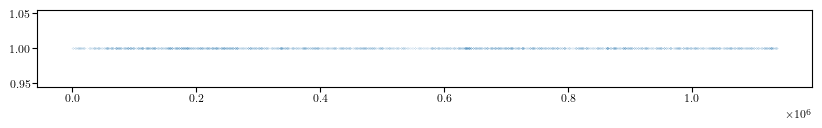

In [17]:
plt.figure(figsize=(10, 1))
plt.plot(change, np.ones(change.shape[0]), '.', markersize=0.05)
plt.show()

In [5]:
path = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints/parallel2x3-prior_num_skills3_sparseFalse_relabelingFalse_priorbufferTrue/evaluations.npz"]

data = np.load(path[0], mmap_mode='r')

for k in data.keys():
    print(k)
    print(data[k])

timesteps
[   5000   10000   15000   20000   25000   30000   35000   40000   45000
   50000   55000   60000   65000   70000   75000   80000   85000   90000
   95000  100000  105000  110000  115000  120000  125000  130000  135000
  140000  145000  150000  155000  160000  165000  170000  175000  180000
  185000  190000  195000  200000  205000  210000  215000  220000  225000
  230000  235000  240000  245000  250000  255000  260000  265000  270000
  275000  280000  285000  290000  295000  300000  305000  310000  315000
  320000  325000  330000  335000  340000  345000  350000  355000  360000
  365000  370000  375000  380000  385000  390000  395000  400000  405000
  410000  415000  420000  425000  430000  435000  440000  445000  450000
  455000  460000  465000  470000  475000  480000  485000  490000  495000
  500000  505000  510000  515000  520000  525000  530000  535000  540000
  545000  550000  555000  560000  565000  570000  575000  580000  585000
  590000  595000  600000  605000  610000 

# **Comparison of parallel training**

In [26]:
shaping_2x3 = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_2902/parallel2x3_num_skills3_sparseFalse_relabelingFalse_priorbufferFalse/evaluations.npz"]

prior_2x3 = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_2902/parallel2x3-prior_num_skills3_sparseFalse_relabelingFalse_priorbufferTrue/evaluations.npz"]

relabel_2x3 = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_2902/parallel2x3-relabel_num_skills3_sparseFalse_relabelingTrue_priorbufferFalse/evaluations.npz"]


sparse_2x3 = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints/parallel2x3_num_skills3_sparseTrue_relabelingFalse_priorbufferFalse/evaluations.npz"]
sparse_prior_2x3 = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints/parallel2x3-prior_num_skills3_sparseTrue_relabelingFalse_priorbufferTrue/evaluations.npz"]
sparse_relabel_2x3 = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints/parallel2x3-relabel_num_skills3_sparseTrue_relabelingTrue_priorbufferFalse/evaluations.npz"]

In [34]:
x = np.load(shaping_2x3[0], mmap_mode='r')["timesteps"]
idx = np.where(x <= 1000000)
x = x[idx]

returns_shaping_2x3, succ_shaping_2x3 = gather_data(shaping_2x3, x, idx)
returns_prior_2x3, succ_prior_2x3 = gather_data(prior_2x3, x, idx)
returns_relabel_2x3, succ_relabel_2x3 = gather_data(relabel_2x3, x, idx)

returns_sparse_2x3, succ_sparse_2x3 = gather_data(sparse_2x3, x, idx)
returns_sparse_prior_2x3, succ_sparse_prior_2x3 = gather_data(sparse_prior_2x3, x, idx)
returns_sparse_relabel_2x3, succ_sparse_relabel_2x3 = gather_data(sparse_relabel_2x3, x, idx)

mean_succ_shaping_2x3, std_succ_shaping_2x3 = compute_mean_std(succ_shaping_2x3)
mean_succ_prior_2x3, std_succ_prior_2x3 = compute_mean_std(succ_prior_2x3)
mean_succ_relabel_2x3, std_succ_relabel_2x3 = compute_mean_std(succ_relabel_2x3)

mean_succ_sparse_2x3, std_succ_sparse_2x3 = compute_mean_std(succ_sparse_2x3)
mean_succ_sparse_prior_2x3, std_succ_sparse_prior_2x3 = compute_mean_std(succ_sparse_prior_2x3)
mean_succ_sparse_relabel_2x3, std_succ_sparse_relabel_2x3 = compute_mean_std(succ_sparse_relabel_2x3)

mean_return_sparse_2x3, std_return_sparse_2x3 = compute_mean_std(returns_sparse_2x3)
mean_return_sparse_prior_2x3, std_return_sparse_prior_2x3 = compute_mean_std(returns_sparse_prior_2x3)
mean_return_sparse_relabel_2x3, std_return_sparse_relabel_2x3 = compute_mean_std(returns_sparse_relabel_2x3)

# **Comparison Influence of Reward Types**

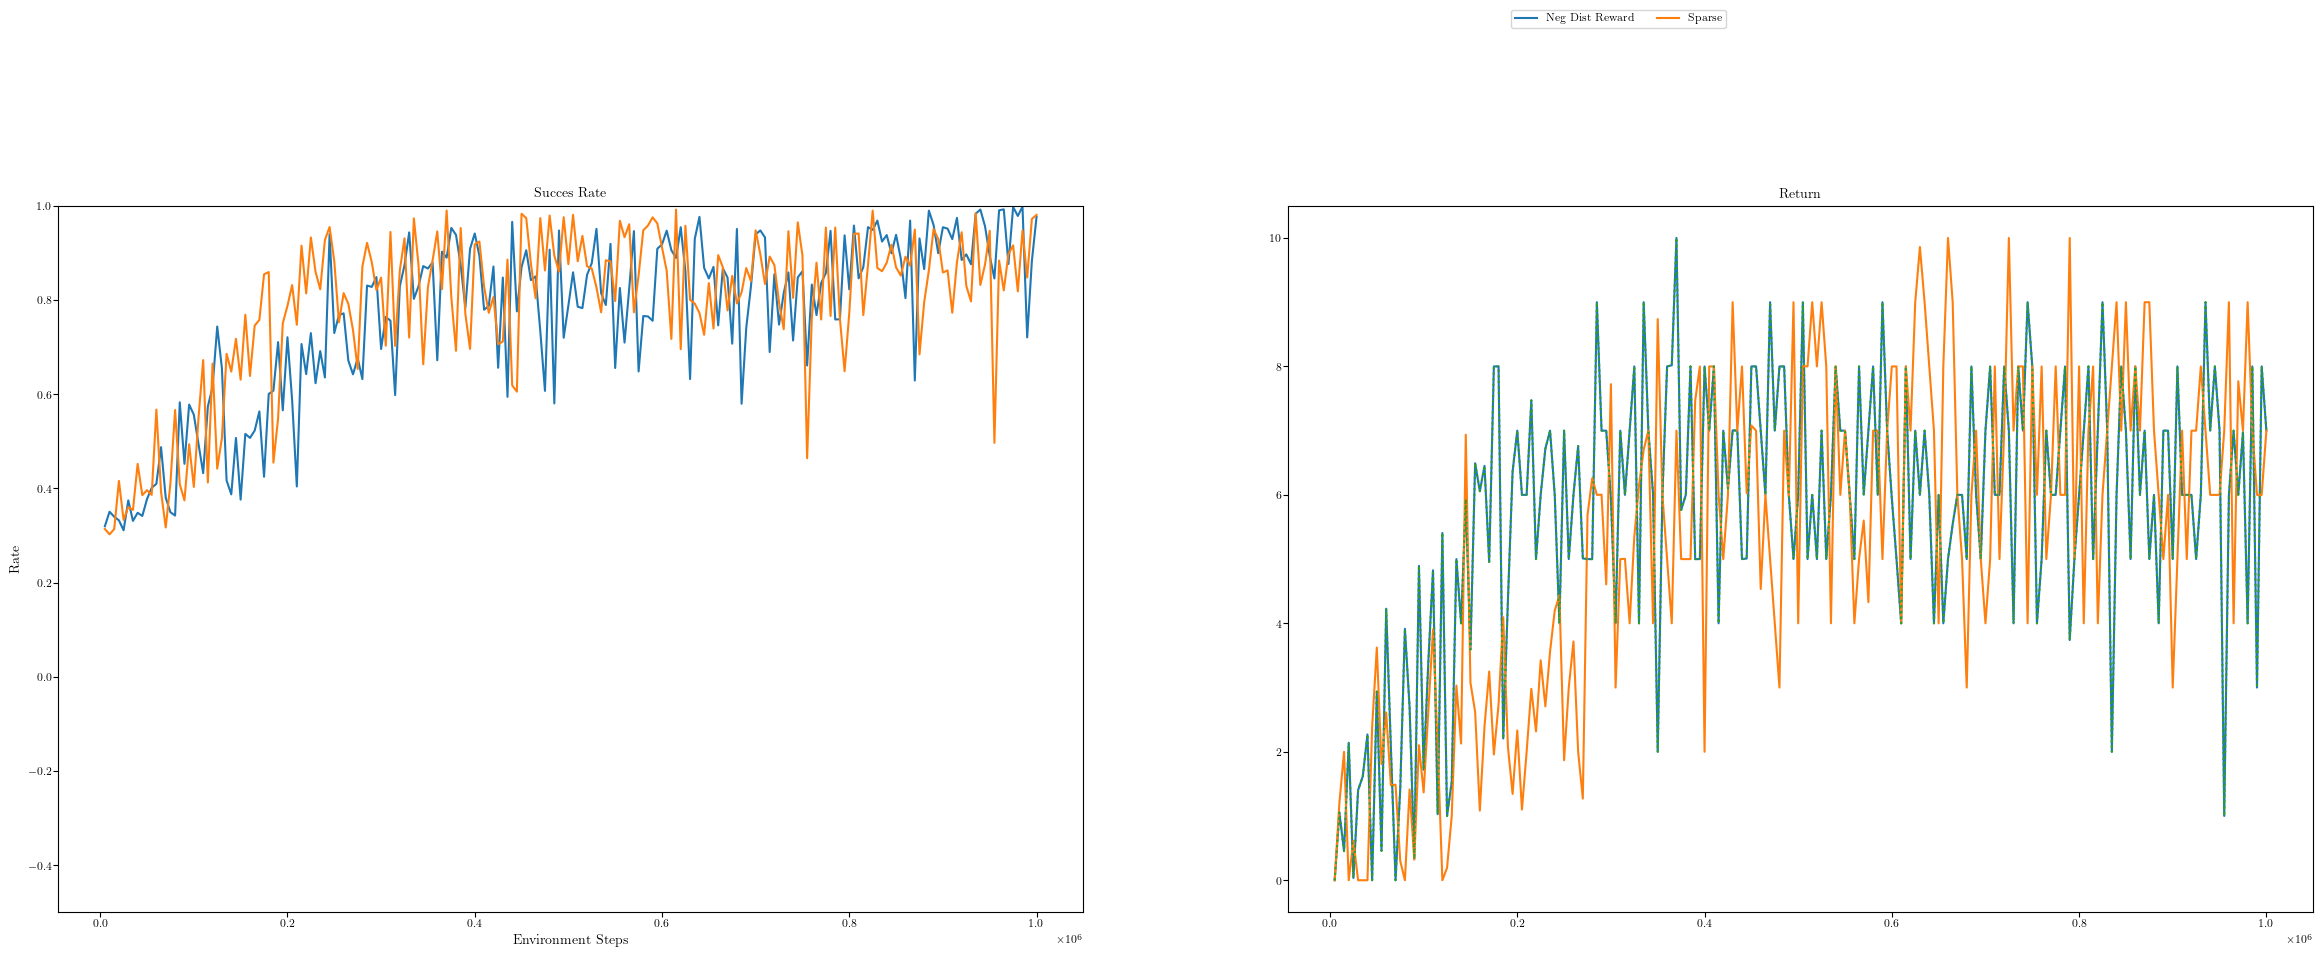

In [42]:
fig, ax = plt.subplots(1, 2, figsize=(5*TEXTWIDTH +0.15, 5*(TEXTWIDTH + 0.15) * (5**.5 - 1) / (2*2)))

# 2x2 puzzle
# 2 skills
ax[0].plot(x, mean_succ_shaping_2x3, label="Neg Dist Reward")
ax[0].fill_between(x, mean_succ_shaping_2x3 + std_succ_shaping_2x3, mean_succ_shaping_2x3 - std_succ_shaping_2x3, alpha=0.3)

#ax[0].plot(x, mean_succ_prior_2x3, label="Neg Dist + Prior Buffer")
#ax[0].fill_between(x, mean_succ_prior_2x3 + std_succ_shaping_2x3, mean_succ_prior_2x3 - std_succ_prior_2x3, alpha=0.3)
#
#ax[0].plot(x, mean_succ_relabel_2x3, ':', label="Neg Dist + Relabeling")
#ax[0].fill_between(x, mean_succ_relabel_2x3 + std_succ_relabel_2x3, mean_succ_relabel_2x3 - std_succ_relabel_2x3, alpha=0.3)

ax[0].plot(x, mean_succ_sparse_2x3, label="Sparse")
ax[0].fill_between(x, mean_succ_sparse_2x3 + std_succ_sparse_2x3, mean_succ_sparse_2x3 - std_succ_sparse_2x3, alpha=0.3)

#ax[0].plot(x, mean_succ_sparse_prior_2x3, label="Sparse + Prior Buffer")
#ax[0].fill_between(x, mean_succ_sparse_prior_2x3 + std_succ_sparse_prior_2x3, mean_succ_sparse_prior_2x3 - std_succ_sparse_prior_2x3, alpha=0.3)
#
#ax[0].plot(x, mean_succ_sparse_relabel_2x3, ':', label="Sparse + Relabeling")
#ax[0].fill_between(x, mean_succ_sparse_relabel_2x3 + std_succ_sparse_relabel_2x3, mean_succ_sparse_relabel_2x3 - std_succ_sparse_relabel_2x3, alpha=0.3)
#
ax[1].plot(x, mean_return_sparse_2x3, label="Sparse")
ax[1].fill_between(x, mean_return_sparse_2x3 + std_return_sparse_2x3, mean_return_sparse_2x3 - std_return_sparse_2x3, alpha=0.3)

ax[1].plot(x, mean_return_sparse_prior_2x3, label="Sparse + Prior Buffer")
ax[0].fill_between(x, mean_return_sparse_prior_2x3 + std_return_sparse_prior_2x3, mean_return_sparse_prior_2x3 - std_return_sparse_prior_2x3, alpha=0.3)

ax[1].plot(x, mean_return_sparse_relabel_2x3, ':', label="Sparse + Relabeling")
ax[1].fill_between(x, mean_return_sparse_relabel_2x3 + std_return_sparse_relabel_2x3, mean_return_sparse_relabel_2x3 - std_return_sparse_relabel_2x3, alpha=0.3)



ax[0].set_ylim(top=1.)
ax[0].set_title("Succes Rate")

ax[1].set_title("Return")

ax[0].set_xlabel('Environment Steps')
ax[0].set_ylabel('Rate')
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, ncol=2, bbox_to_anchor=(0.7,1.1))
plt.savefig("Comparison-Reward_Shaping.pdf",
            bbox_inches='tight', dpi=plt.gcf().dpi)#,
            #dpi=1000)
plt.show()

In [23]:
path_negdist_2x2_8skills = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_8skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed123456/evaluations.npz",
                    "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_8skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed126224/evaluations.npz",
                    "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_8skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed214779/evaluations.npz",
                    "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_8skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed285719/evaluations.npz",
                    "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_8skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed487193/evaluations.npz",
                    "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_8skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed495813/evaluations.npz",
                    "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_8skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed582759/evaluations.npz",
                    "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_8skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed682147/evaluations.npz",
                    "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_8skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed918504/evaluations.npz",
                    "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_8skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed978623/evaluations.npz"]

In [6]:
path_sparse_2x2_2skills = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_2skills_predefined_neg_distFalse_movementFalse_sparseTrue_seed123456/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_2skills_predefined_neg_distFalse_movementFalse_sparseTrue_seed126224/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_2skills_predefined_neg_distFalse_movementFalse_sparseTrue_seed214779/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_2skills_predefined_neg_distFalse_movementFalse_sparseTrue_seed285719/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_2skills_predefined_neg_distFalse_movementFalse_sparseTrue_seed487193/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_2skills_predefined_neg_distFalse_movementFalse_sparseTrue_seed495813/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_2skills_predefined_neg_distFalse_movementFalse_sparseTrue_seed582759/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_2skills_predefined_neg_distFalse_movementFalse_sparseTrue_seed682147/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_2skills_predefined_neg_distFalse_movementFalse_sparseTrue_seed918504/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_2skills_predefined_neg_distFalse_movementFalse_sparseTrue_seed978623/evaluations.npz"]

# neg dist multiplied with 5
#path_negdist_2x2 = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/skill_conditioned_2x2_2skills_num_skills8_neg_distTrue_movementFalse_reward_on_changeFalse_sparseFalse_seed123456/evaluations.npz",
#                    "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/skill_conditioned_2x2_2skills_num_skills8_neg_distTrue_movementFalse_reward_on_changeFalse_sparseFalse_seed126224/evaluations.npz",
#                    "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/skill_conditioned_2x2_2skills_num_skills8_neg_distTrue_movementFalse_reward_on_changeFalse_sparseFalse_seed214779/evaluations.npz",
#                    "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/skill_conditioned_2x2_2skills_num_skills8_neg_distTrue_movementFalse_reward_on_changeFalse_sparseFalse_seed285719/evaluations.npz",
#                    "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/skill_conditioned_2x2_2skills_num_skills8_neg_distTrue_movementFalse_reward_on_changeFalse_sparseFalse_seed487193/evaluations.npz",
#                    "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/skill_conditioned_2x2_2skills_num_skills8_neg_distTrue_movementFalse_reward_on_changeFalse_sparseFalse_seed495813/evaluations.npz",
#                    "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/skill_conditioned_2x2_2skills_num_skills8_neg_distTrue_movementFalse_reward_on_changeFalse_sparseFalse_seed582759/evaluations.npz",
#                    "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/skill_conditioned_2x2_2skills_num_skills8_neg_distTrue_movementFalse_reward_on_changeFalse_sparseFalse_seed682147/evaluations.npz",
#                    "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/skill_conditioned_2x2_2skills_num_skills8_neg_distTrue_movementFalse_reward_on_changeFalse_sparseFalse_seed918504/evaluations.npz",
#                    "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/skill_conditioned_2x2_2skills_num_skills8_neg_distTrue_movementFalse_reward_on_changeFalse_sparseFalse_seed978623/evaluations.npz"]


# 0.5 * neg dist
path_negdist_2x2_2skills = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_2skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed123456/evaluations.npz",
                            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_2skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed126224/evaluations.npz",
                            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_2skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed214779/evaluations.npz",
                            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_2skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed285719/evaluations.npz",
                            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_2skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed487193/evaluations.npz",
                            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_2skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed495813/evaluations.npz",
                            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_2skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed582759/evaluations.npz",
                            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_2skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed682147/evaluations.npz",
                            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_2skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed918504/evaluations.npz",
                            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_2skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed978623/evaluations.npz"]

# 0.5 * neg dist
path_neg_move_2x2_2skills = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_2skills_predefined_neg_distTrue_movementTrue_sparseFalse_seed123456/evaluations.npz",
                            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_2skills_predefined_neg_distTrue_movementTrue_sparseFalse_seed126224/evaluations.npz",
                            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_2skills_predefined_neg_distTrue_movementTrue_sparseFalse_seed214779/evaluations.npz",
                            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_2skills_predefined_neg_distTrue_movementTrue_sparseFalse_seed285719/evaluations.npz",
                            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_2skills_predefined_neg_distTrue_movementTrue_sparseFalse_seed487193/evaluations.npz",
                            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_2skills_predefined_neg_distTrue_movementTrue_sparseFalse_seed495813/evaluations.npz",
                            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_2skills_predefined_neg_distTrue_movementTrue_sparseFalse_seed582759/evaluations.npz",
                            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_2skills_predefined_neg_distTrue_movementTrue_sparseFalse_seed682147/evaluations.npz",
                            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_2skills_predefined_neg_distTrue_movementTrue_sparseFalse_seed918504/evaluations.npz",
                            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_2skills_predefined_neg_distTrue_movementTrue_sparseFalse_seed978623/evaluations.npz"]

path_move_2x2_2skills = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_2skills_predefined_neg_distTrue_movementTrue_sparseFalse_seed123456/evaluations.npz",
                            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_2skills_predefined_neg_distFalse_movementTrue_sparseFalse_seed126224/evaluations.npz",
                            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_2skills_predefined_neg_distFalse_movementTrue_sparseFalse_seed214779/evaluations.npz",
                            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_2skills_predefined_neg_distFalse_movementTrue_sparseFalse_seed285719/evaluations.npz",
                            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_2skills_predefined_neg_distFalse_movementTrue_sparseFalse_seed487193/evaluations.npz",
                            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_2skills_predefined_neg_distFalse_movementTrue_sparseFalse_seed495813/evaluations.npz",
                            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_2skills_predefined_neg_distFalse_movementTrue_sparseFalse_seed582759/evaluations.npz",
                            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_2skills_predefined_neg_distFalse_movementTrue_sparseFalse_seed682147/evaluations.npz",
                            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_2skills_predefined_neg_distFalse_movementTrue_sparseFalse_seed918504/evaluations.npz",
                            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_2skills_predefined_neg_distFalse_movementTrue_sparseFalse_seed978623/evaluations.npz"]

In [11]:
path_sparse_2x3_3skills = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distFalse_movementFalse_sparseTrue_seed123456/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distFalse_movementFalse_sparseTrue_seed126224/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distFalse_movementFalse_sparseTrue_seed214779/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distFalse_movementFalse_sparseTrue_seed285719/evaluations.npz","/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distFalse_movementFalse_sparseTrue_seed123456/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distFalse_movementFalse_sparseTrue_seed487193/evaluations.npz","/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distFalse_movementFalse_sparseTrue_seed123456/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distFalse_movementFalse_sparseTrue_seed495813/evaluations.npz","/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distFalse_movementFalse_sparseTrue_seed123456/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distFalse_movementFalse_sparseTrue_seed582759/evaluations.npz"]

# 0.5 * negdist
path_negdist_2x3_3skills = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed123456/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed126224/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed214779/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed285719/evaluations.npz","/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed487193/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed495813/evaluations.npz","/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed582759/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed682147/evaluations.npz","/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed918504/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed978623//evaluations.npz"]

path_neg_move_2x3_3skills = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distTrue_movementTrue_sparseFalse_seed123456/evaluations.npz",
                             "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distTrue_movementTrue_sparseFalse_seed126224/evaluations.npz",
                             "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distTrue_movementTrue_sparseFalse_seed214779/evaluations.npz",
                             "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distTrue_movementTrue_sparseFalse_seed285719/evaluations.npz",
                             "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distTrue_movementTrue_sparseFalse_seed487193/evaluations.npz",
                             "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distTrue_movementTrue_sparseFalse_seed495813/evaluations.npz",
                             "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distTrue_movementTrue_sparseFalse_seed582759/evaluations.npz",
                             "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distTrue_movementTrue_sparseFalse_seed682147/evaluations.npz",
                             "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distTrue_movementTrue_sparseFalse_seed918504/evaluations.npz",
                             "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distTrue_movementTrue_sparseFalse_seed978623//evaluations.npz"]

path_move_2x3_3skills = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distFalse_movementTrue_sparseFalse_seed123456/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distFalse_movementTrue_sparseFalse_seed126224/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distFalse_movementTrue_sparseFalse_seed214779/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distFalse_movementTrue_sparseFalse_seed285719/evaluations.npz","/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distFalse_movementTrue_sparseFalse_seed487193/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distFalse_movementTrue_sparseFalse_seed495813/evaluations.npz","/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distFalse_movementTrue_sparseFalse_seed582759/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distFalse_movementTrue_sparseFalse_seed682147/evaluations.npz","/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distFalse_movementTrue_sparseFalse_seed918504/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distFalse_movementTrue_sparseFalse_seed978623//evaluations.npz"]

sparse_2x3 = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined_2x2/2x3_3skills_neg_distFalse_movementFalse_sparseTrue_seed487193/evaluations.npz",
              "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined_2x2/2x3_3skills_neg_distFalse_movementFalse_sparseTrue_seed123456/evaluations.npz"]

In [8]:
path_sparse_3x3_4skills = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distFalse_movementFalse_sparseTrue_seed123456/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distFalse_movementFalse_sparseTrue_seed126224/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distFalse_movementFalse_sparseTrue_seed214779/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distFalse_movementFalse_sparseTrue_seed285719/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distFalse_movementFalse_sparseTrue_seed487193/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distFalse_movementFalse_sparseTrue_seed495813/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distFalse_movementFalse_sparseTrue_seed582759/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distFalse_movementFalse_sparseTrue_seed682147/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distFalse_movementFalse_sparseTrue_seed918504/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distFalse_movementFalse_sparseTrue_seed978623/evaluations.npz"]

path_negdist_3x3_4skills = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed123456/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed126224/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed214779/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed285719/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed487193/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed495813/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed582759/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed682147/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed918504/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed978623/evaluations.npz"]

path_neg_move_3x3_4skills = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distTrue_movementTrue_sparseFalse_seed123456/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distTrue_movementTrue_sparseFalse_seed126224/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distTrue_movementTrue_sparseFalse_seed214779/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distTrue_movementTrue_sparseFalse_seed285719/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distTrue_movementTrue_sparseFalse_seed487193/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distTrue_movementTrue_sparseFalse_seed495813/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distTrue_movementTrue_sparseFalse_seed582759/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distTrue_movementTrue_sparseFalse_seed682147/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distTrue_movementTrue_sparseFalse_seed918504/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distTrue_movementTrue_sparseFalse_seed978623/evaluations.npz"]

path_move_3x3_4skills = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distFalse_movementTrue_sparseFalse_seed123456/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distFalse_movementTrue_sparseFalse_seed126224/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distFalse_movementTrue_sparseFalse_seed214779/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distFalse_movementTrue_sparseFalse_seed285719/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distFalse_movementTrue_sparseFalse_seed487193/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distFalse_movementTrue_sparseFalse_seed495813/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distFalse_movementTrue_sparseFalse_seed582759/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distFalse_movementTrue_sparseFalse_seed682147/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distFalse_movementTrue_sparseFalse_seed918504/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distFalse_movementTrue_sparseFalse_seed978623/evaluations.npz"]

In [12]:
x1 = np.load(path_sparse_2x2_2skills[0], mmap_mode='r')["timesteps"]
idx = np.where(x1 <= 155000)
x1 = x1[idx]

returns_sparse_2x2_2skills, succ_sparse_2x2_2skills = gather_data(path_sparse_2x2_2skills, x1, idx)
returns_negdist_2x2_2skills, succ_negdist_2x2_2skills = gather_data(path_negdist_2x2_2skills, x1, idx)
returns_neg_move_2x2_2skills, succ_neg_move_2x2_2skills = gather_data(path_neg_move_2x2_2skills, x1, idx)
returns_move_2x2_2skills, succ_move_2x2_2skills = gather_data(path_move_2x2_2skills, x1, idx)
#returns_negdist_2x2_8skills, succ_negdist_2x2_8skills = gather_data(path_negdist_2x2_8skills, x1, idx)

mean_succ_sparse_2x2_2skills, std_succ_sparse_2x2_2skills = compute_mean_std(succ_sparse_2x2_2skills)
mean_succ_negdist_2x2_2skills, std_succ_negdist_2x2_2skills = compute_mean_std(succ_negdist_2x2_2skills)
mean_succ_neg_move_2x2_2skills, std_succ_neg_move_2x2_2skills = compute_mean_std(succ_neg_move_2x2_2skills)
mean_succ_move_2x2_2skills, std_succ_move_2x2_2skills = compute_mean_std(succ_move_2x2_2skills)
#mean_succ_negdist_2x2_8skills, std_succ_negdist_2x2_8skills = compute_mean_std(succ_negdist_2x2_8skills)

In [18]:
x2 = np.load(path_sparse_2x3_3skills[0], mmap_mode='r')["timesteps"]
idx = np.where(x2 <= 200000)
x2 = x2[idx]

x2_1 = np.load(path_neg_move_2x3_3skills[0], mmap_mode='r')["timesteps"]
idx_2 = np.where(x2_1 <= 189000)
x2_1 = x2_1[idx_2]

x2_2 = np.load(sparse_2x3[0], mmap_mode='r')["timesteps"]
idx_3 = np.where(x2_2 <= 800000)
x2_2 = x2_2[idx_3]

returns_sparse_2x3_3skills, succ_sparse_2x3_3skills = gather_data(path_sparse_2x3_3skills, x2, idx)
returns_negdist_2x3_3skills, succ_negdist_2x3_3skills = gather_data(path_negdist_2x3_3skills, x2, idx)
returns_neg_move_2x3_3skills, succ_neg_move_2x3_3skills = gather_data(path_neg_move_2x3_3skills, x2_1, idx_2)
returns_move_2x3_3skills, succ_move_2x3_3skills = gather_data(path_move_2x3_3skills, x2, idx)


returns_sparse_2x3, succ_sparse_2x3 = gather_data(sparse_2x3, x2_2, idx_3)
mean_succ_sparse_2x3, std_succ_sparse_2x3 = compute_mean_std(succ_sparse_2x3)

mean_succ_sparse_2x3_3skills, std_succ_sparse_2x3_3skills = compute_mean_std(succ_sparse_2x3_3skills)
mean_succ_negdist_2x3_3skills, std_succ_negdist_2x3_3skills = compute_mean_std(succ_negdist_2x3_3skills)
mean_succ_neg_move_2x3_3skills, std_succ_neg_move_2x3_3skills = compute_mean_std(succ_neg_move_2x3_3skills)
mean_succ_move_2x3_3skills, std_succ_move_2x3_3skills = compute_mean_std(succ_move_2x3_3skills)

In [20]:
x3 = np.load(path_sparse_3x3_4skills[0], mmap_mode='r')["timesteps"]
idx = np.where(x3 <= 200000)
x3 = x3[idx]

returns_sparse_3x3_4skills, succ_sparse_3x3_4skills = gather_data(path_sparse_3x3_4skills, x3, idx)
returns_negdist_3x3_4skills, succ_negdist_3x3_4skills = gather_data(path_negdist_3x3_4skills, x3, idx)
returns_neg_move_3x3_4skills, succ_neg_move_3x3_4skills = gather_data(path_neg_move_3x3_4skills, x3, idx)
returns_move_3x3_4skills, succ_move_3x3_4skills = gather_data(path_move_3x3_4skills, x3, idx)

mean_succ_sparse_3x3_4skills, std_succ_sparse_3x3_4skills = compute_mean_std(succ_sparse_3x3_4skills)
mean_succ_negdist_3x3_4skills, std_succ_negdist_3x3_4skills = compute_mean_std(succ_negdist_3x3_4skills)
mean_succ_neg_move_3x3_4skills, std_succ_neg_move_3x3_4skills = compute_mean_std(succ_neg_move_3x3_4skills)
mean_succ_move_3x3_4skills, std_succ_move_3x3_4skills = compute_mean_std(succ_move_3x3_4skills)

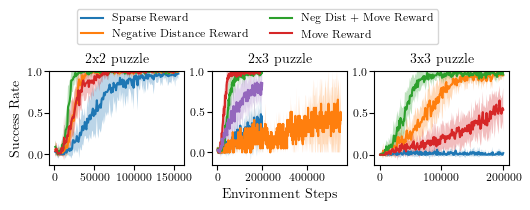

In [21]:
fig, ax = plt.subplots(1, 3, figsize=(TEXTWIDTH +0.15, (TEXTWIDTH + 0.15) * (5**.5 - 1) / (2 * 3)))

# 2x2 puzzle
# 2 skills
ax[0].plot(x1, mean_succ_sparse_2x2_2skills, label="Sparse Reward")
ax[0].fill_between(x1, mean_succ_sparse_2x2_2skills + std_succ_sparse_2x2_2skills, mean_succ_sparse_2x2_2skills - std_succ_sparse_2x2_2skills, alpha=0.3)

ax[0].plot(x1, mean_succ_negdist_2x2_2skills, label="Negative Distance Reward")
ax[0].fill_between(x1, mean_succ_negdist_2x2_2skills + std_succ_negdist_2x2_2skills, mean_succ_negdist_2x2_2skills - std_succ_negdist_2x2_2skills, alpha=0.3)

ax[0].plot(x1, mean_succ_neg_move_2x2_2skills, label="Negative Dist + Move Reward")
ax[0].fill_between(x1, mean_succ_neg_move_2x2_2skills + std_succ_neg_move_2x2_2skills, mean_succ_neg_move_2x2_2skills - std_succ_neg_move_2x2_2skills, alpha=0.3)

ax[0].plot(x1, mean_succ_move_2x2_2skills, label="Move Reward")
ax[0].fill_between(x1, mean_succ_move_2x2_2skills + std_succ_move_2x2_2skills, mean_succ_move_2x2_2skills - std_succ_move_2x2_2skills, alpha=0.3)


# 8 skills
#ax[0].plot(x1, mean_succ_negdist_2x2_8skills, label="Negative Distance Reward 2x2 with 8 skills")
#ax[0].fill_between(x1, mean_succ_negdist_2x2_8skills + std_succ_negdist_2x2_8skills, mean_succ_negdist_2x2_8skills - std_succ_negdist_2x2_8skills, alpha=0.3)

# 2x3 puzzle
ax[1].plot(x2, mean_succ_sparse_2x3_3skills, label="Sparse Reward")
ax[1].fill_between(x2, mean_succ_sparse_2x3_3skills + std_succ_sparse_2x3_3skills, mean_succ_sparse_2x3_3skills - std_succ_sparse_2x3_3skills, alpha=0.3)

ax[1].plot(x2_2, mean_succ_sparse_2x3, label="Sparse Reward")
ax[1].fill_between(x2_2, mean_succ_sparse_2x3 + std_succ_sparse_2x3, mean_succ_sparse_2x3 - std_succ_sparse_2x3, alpha=0.3)

ax[1].plot(x2, mean_succ_negdist_2x3_3skills, label="Negative Distance Reward")
ax[1].fill_between(x2, mean_succ_negdist_2x3_3skills + std_succ_negdist_2x3_3skills, mean_succ_negdist_2x3_3skills - std_succ_negdist_2x3_3skills, alpha=0.3)

ax[1].plot(x2_1, mean_succ_neg_move_2x3_3skills, label="Neg Dist + Move Reward")
ax[1].fill_between(x2_1, mean_succ_neg_move_2x3_3skills + std_succ_neg_move_2x3_3skills, mean_succ_neg_move_2x3_3skills - std_succ_neg_move_2x3_3skills, alpha=0.3)

ax[1].plot(x2, mean_succ_move_2x3_3skills, label="Move Reward")
ax[1].fill_between(x2, mean_succ_move_2x3_3skills + std_succ_move_2x3_3skills, mean_succ_move_2x3_3skills - std_succ_move_2x3_3skills, alpha=0.3)

# 3x3 puzzle
ax[2].plot(x3, mean_succ_sparse_3x3_4skills, label="Sparse Reward")
ax[2].fill_between(x3, mean_succ_sparse_3x3_4skills + std_succ_sparse_3x3_4skills, mean_succ_sparse_3x3_4skills - std_succ_sparse_3x3_4skills, alpha=0.3)

ax[2].plot(x3, mean_succ_negdist_3x3_4skills, label="Negative Distance Reward")
ax[2].fill_between(x3, mean_succ_negdist_3x3_4skills + std_succ_negdist_3x3_4skills, mean_succ_negdist_3x3_4skills - std_succ_negdist_3x3_4skills, alpha=0.3)

ax[2].plot(x3, mean_succ_neg_move_3x3_4skills, label="Neg Dist + Move Reward")
ax[2].fill_between(x3, mean_succ_neg_move_3x3_4skills + std_succ_neg_move_3x3_4skills, mean_succ_neg_move_3x3_4skills - std_succ_neg_move_3x3_4skills, alpha=0.3)

ax[2].plot(x3, mean_succ_move_3x3_4skills, label="Move Reward")
ax[2].fill_between(x3, mean_succ_move_3x3_4skills + std_succ_move_3x3_4skills, mean_succ_move_3x3_4skills - std_succ_move_3x3_4skills, alpha=0.3)




ax[0].set_ylim(top=1.)
ax[1].set_ylim(top=1.)
ax[2].set_ylim(top=1.)
ax[0].set_title("2x2 puzzle")
ax[1].set_title("2x3 puzzle")
ax[2].set_title("3x3 puzzle")

#ax[0, 0].set_xticklabels([])

#for i in range(2):
#    for j in range(3):
#        ax[i, j].locator_params(axis='y', nbins=3)

ax[1].set_xlabel('Environment Steps')
ax[0].set_ylabel('Success Rate')
handles, labels = ax[2].get_legend_handles_labels()
fig.legend(handles, labels, ncol=2, bbox_to_anchor=(0.79,1.43))
plt.savefig("Comparison-Reward_Shaping.pdf",
            bbox_inches='tight', dpi=plt.gcf().dpi)#,
            #dpi=1000)
plt.show()

# **Comparison of Puzzle Sizes**

In [143]:
path_1x2 = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints/1x2_neg_distTrue_movementFalse_reward_on_changeTrue_sparseFalse_seed12345/evaluations.npz",
            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints/1x2_neg_distTrue_movementFalse_reward_on_changeTrue_sparseFalse_seed25971/evaluations.npz",
            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints/1x2_neg_distTrue_movementFalse_reward_on_changeTrue_sparseFalse_seed19471/evaluations.npz",
            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints/1x2_neg_distTrue_movementFalse_reward_on_changeTrue_sparseFalse_seed47581/evaluations.npz"]

path_2x2 = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints/2x2_neg_distTrue_movementFalse_reward_on_changeTrue_sparseFalse_seed12345/evaluations.npz",
            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints/2x2_neg_distTrue_movementFalse_reward_on_changeTrue_sparseFalse_seed25971/evaluations.npz",
            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints/2x2_neg_distTrue_movementFalse_reward_on_changeTrue_sparseFalse_seed19471/evaluations.npz",
            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints/2x2_neg_distTrue_movementFalse_reward_on_changeTrue_sparseFalse_seed47581/evaluations.npz"]

path_2x3 = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints/2x3_neg_distTrue_movementFalse_reward_on_changeTrue_sparseFalse_seed12345/evaluations.npz",
            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints/2x3_neg_distTrue_movementFalse_reward_on_changeTrue_sparseFalse_seed25971/evaluations.npz",
            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints/2x3_neg_distTrue_movementFalse_reward_on_changeTrue_sparseFalse_seed19471/evaluations.npz",
            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints/2x3_neg_distTrue_movementFalse_reward_on_changeTrue_sparseFalse_seed47581/evaluations.npz"]

path_3x3 = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints/3x3_neg_distTrue_movementFalse_reward_on_changeTrue_sparseFalse_seed12345/evaluations.npz",
            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints/3x3_neg_distTrue_movementFalse_reward_on_changeTrue_sparseFalse_seed25971/evaluations.npz",
            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints/3x3_neg_distTrue_movementFalse_reward_on_changeTrue_sparseFalse_seed19471/evaluations.npz",
            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints/3x3_neg_distTrue_movementFalse_reward_on_changeTrue_sparseFalse_seed47581/evaluations.npz"]

In [144]:
x = np.load(path_3x3[0], mmap_mode='r')["timesteps"]
idx = np.where(x <= 2230000)
x = x[idx]

returns_1x2, succ_1x2 = gather_data(path_1x2, x, idx)
returns_2x2, succ_2x2 = gather_data(path_2x2, x, idx)
returns_2x3, succ_2x3 = gather_data(path_2x3, x, idx)
returns_3x3, succ_3x3 = gather_data(path_3x3, x, idx)

mean_succ_1x2, std_succ_1x2 = compute_mean_std(x, succ_1x2)
mean_succ_2x2, std_succ_2x2 = compute_mean_std(x, succ_2x2)
mean_succ_2x3, std_succ_2x3 = compute_mean_std(x, succ_2x3)
mean_succ_3x3, std_succ_3x3 = compute_mean_std(x, succ_3x3)

FileNotFoundError: [Errno 2] No such file or directory: '/home/rosa/Documents/Uni/Masterarbeit/checkpoints/3x3_neg_distTrue_movementFalse_reward_on_changeTrue_sparseFalse_seed12345/evaluations.npz'

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(TEXTWIDTH +0.1, TEXTWIDTH * (5**.5 - 1.2) / 2))

ax.plot(x, mean_succ_1x2, label="1x2 Puzzle")
ax.fill_between(x, mean_succ_1x2 + std_succ_1x2, mean_succ_1x2 - std_succ_1x2, alpha=0.3)

ax.plot(x, mean_succ_2x2, label="2x2 Puzzle")
ax.fill_between(x, mean_succ_2x2 + std_succ_1x2, mean_succ_2x2 - std_succ_2x2, alpha=0.3)

ax.plot(x, mean_succ_2x3, label="2x3 Puzzle")
ax.fill_between(x, mean_succ_2x3 + std_succ_2x3, mean_succ_2x3 - std_succ_2x3, alpha=0.3)

ax.plot(x, mean_succ_3x3, label="3x3 Puzzle")
ax.fill_between(x, mean_succ_3x3 + std_succ_3x3, mean_succ_3x3 - std_succ_3x3, alpha=0.3)

ax.set_ylim(top=1.)
ax.set_title("Sparse and Neg Dist Reward")

#ax[0, 0].set_xticklabels([])

#for i in range(2):
#    for j in range(3):
#        ax[i, j].locator_params(axis='y', nbins=3)

ax.set_xlabel('Environment Steps')
ax.set_ylabel('Average Success Rate')
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, ncol=2, bbox_to_anchor=(0.79,1.035))
plt.savefig("Comparison-PuzzleSize.pdf",
            bbox_inches='tight', dpi=plt.gcf().dpi)#,
            #dpi=1000)
plt.show()

# **Comparison of Observation Spaces**

In [38]:
path_coor = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_obs_space_comp/skill_conditioned_2x2_coord_num_skills8_neg_distFalse_movementFalse_reward_on_changeFalse_sparseFalse_seed123456/evaluations.npz",
             "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_obs_space_comp/skill_conditioned_2x2_coord_num_skills8_neg_distFalse_movementFalse_reward_on_changeFalse_sparseFalse_seed126224/evaluations.npz",
             "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_obs_space_comp/skill_conditioned_2x2_coord_num_skills8_neg_distFalse_movementFalse_reward_on_changeFalse_sparseFalse_seed214779/evaluations.npz",
             "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_obs_space_comp/skill_conditioned_2x2_coord_num_skills8_neg_distFalse_movementFalse_reward_on_changeFalse_sparseFalse_seed285719/evaluations.npz",
             "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_obs_space_comp/skill_conditioned_2x2_coord_num_skills8_neg_distFalse_movementFalse_reward_on_changeFalse_sparseFalse_seed487193/evaluations.npz",
             "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_obs_space_comp/skill_conditioned_2x2_coord_num_skills8_neg_distFalse_movementFalse_reward_on_changeFalse_sparseFalse_seed495813/evaluations.npz",
             "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_obs_space_comp/skill_conditioned_2x2_coord_num_skills8_neg_distFalse_movementFalse_reward_on_changeFalse_sparseFalse_seed582759/evaluations.npz",
             "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_obs_space_comp/skill_conditioned_2x2_coord_num_skills8_neg_distFalse_movementFalse_reward_on_changeFalse_sparseFalse_seed682147/evaluations.npz",
             "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_obs_space_comp/skill_conditioned_2x2_coord_num_skills8_neg_distFalse_movementFalse_reward_on_changeFalse_sparseFalse_seed918504/evaluations.npz",
             "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_obs_space_comp/skill_conditioned_2x2_coord_num_skills8_neg_distFalse_movementFalse_reward_on_changeFalse_sparseFalse_seed978623/evaluations.npz"]

path_nocoor = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_obs_space_comp/skill_conditioned_2x2_no-coord_num_skills8_neg_distFalse_movementFalse_reward_on_changeFalse_sparseFalse_seed123456/evaluations.npz",
             "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_obs_space_comp/skill_conditioned_2x2_no-coord_num_skills8_neg_distFalse_movementFalse_reward_on_changeFalse_sparseFalse_seed126224/evaluations.npz",
             "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_obs_space_comp/skill_conditioned_2x2_no-coord_num_skills8_neg_distFalse_movementFalse_reward_on_changeFalse_sparseFalse_seed214779/evaluations.npz",
             "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_obs_space_comp/skill_conditioned_2x2_no-coord_num_skills8_neg_distFalse_movementFalse_reward_on_changeFalse_sparseFalse_seed285719/evaluations.npz",
             "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_obs_space_comp/skill_conditioned_2x2_no-coord_num_skills8_neg_distFalse_movementFalse_reward_on_changeFalse_sparseFalse_seed487193/evaluations.npz",
             "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_obs_space_comp/skill_conditioned_2x2_no-coord_num_skills8_neg_distFalse_movementFalse_reward_on_changeFalse_sparseFalse_seed495813/evaluations.npz",
             "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_obs_space_comp/skill_conditioned_2x2_no-coord_num_skills8_neg_distFalse_movementFalse_reward_on_changeFalse_sparseFalse_seed582759/evaluations.npz",
             "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_obs_space_comp/skill_conditioned_2x2_no-coord_num_skills8_neg_distFalse_movementFalse_reward_on_changeFalse_sparseFalse_seed682147/evaluations.npz",
             "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_obs_space_comp/skill_conditioned_2x2_no-coord_num_skills8_neg_distFalse_movementFalse_reward_on_changeFalse_sparseFalse_seed918504/evaluations.npz",
             "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_obs_space_comp/skill_conditioned_2x2_no-coord_num_skills8_neg_distFalse_movementFalse_reward_on_changeFalse_sparseFalse_seed978623/evaluations.npz"]

In [39]:
x = np.load(path_coor[0], mmap_mode='r')["timesteps"]
idx_coor = np.where(x <= 172000)
x_coor = x[idx_coor]

x = np.load(path_nocoor[0], mmap_mode='r')['timesteps']
idx_nocoor = np.where(x <= 182000)
x_nocoor = x[idx_nocoor]
print(x_nocoor[-1])

returns_coor, succ_coor = gather_data(path_coor, x_coor, idx_coor)
returns_nocoo, succ_nocoor = gather_data(path_nocoor, x_nocoor, idx_nocoor)

mean_succ_coor, std_succ_coor = compute_mean_std(succ_coor)
mean_succ_nocoor, std_succ_nocoor = compute_mean_std(succ_nocoor)

182000


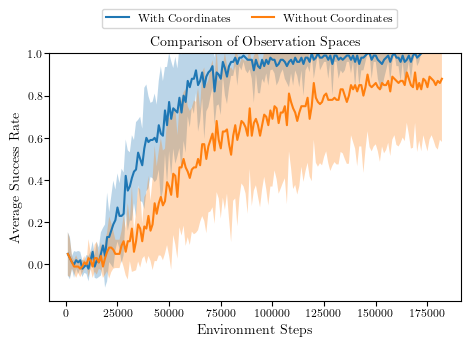

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(0.9 * TEXTWIDTH +0.1, 0.9 * TEXTWIDTH * (5**.5 - 1) / 2))

ax.plot(x_coor, mean_succ_coor, label="With Coordinates")
ax.fill_between(x_coor, mean_succ_coor + std_succ_coor, mean_succ_coor - std_succ_coor, alpha=0.3)

ax.plot(x_nocoor, mean_succ_nocoor, label="Without Coordinates")
ax.fill_between(x_nocoor, mean_succ_nocoor + std_succ_nocoor, mean_succ_nocoor - std_succ_nocoor, alpha=0.3)

ax.set_ylim(top=1.)
ax.set_title("Comparison of Observation Spaces")

#ax[0, 0].set_xticklabels([])

#for i in range(2):
#    for j in range(3):
#        ax.locator_params(axis='y', nbins=3)

ax.set_xlabel('Environment Steps')
ax.set_ylabel('Average Success Rate')
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, ncol=2, bbox_to_anchor=(0.79,1.035))
plt.savefig("Comparison-Obs-Space.pdf",
            bbox_inches='tight', dpi=plt.gcf().dpi)#,
            #dpi=1000)
plt.show()

## **Dict vs. flat Box**

In [41]:
path_flat_2x2 = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_obs_space_comp/skill_conditioned_2x2_flatBox_num_skills8_neg_distFalse_movementFalse_reward_on_changeFalse_sparseTrue_seed123456/evaluations.npz",
                 "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_obs_space_comp/skill_conditioned_2x2_flatBox_num_skills8_neg_distFalse_movementFalse_reward_on_changeFalse_sparseTrue_seed487193/evaluations.npz"]

path_dict_2x2 = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_obs_space_comp/skill_conditioned_2x2_dict_num_skills8_neg_distFalse_movementFalse_reward_on_changeFalse_sparseTrue_seed123456/evaluations.npz",
                 "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_obs_space_comp/skill_conditioned_2x2_dict_num_skills8_neg_distFalse_movementFalse_reward_on_changeFalse_sparseTrue_seed487193/evaluations.npz"]


In [42]:
x = np.load(path_flat_2x2[0], mmap_mode='r')["timesteps"]
idx = np.where(x <= 160000)
x = x[idx]

print(x)

returns_flat, succ_flat = gather_data(path_flat_2x2, x, idx)
returns_dict, succ_dict = gather_data(path_dict_2x2, x, idx)

print(returns_flat)

mean_succ_flat, std_succ_flat = compute_mean_std(succ_flat)
mean_succ_dict, std_succ_dict = compute_mean_std(succ_dict)

FileNotFoundError: [Errno 2] No such file or directory: '/home/rosa/Documents/Uni/Masterarbeit/checkpoints_obs_space_comp/skill_conditioned_2x2_flatBox_num_skills8_neg_distFalse_movementFalse_reward_on_changeFalse_sparseTrue_seed123456/evaluations.npz'

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(TEXTWIDTH +0.1, TEXTWIDTH * (5**.5 - 1.2) / 2))

ax.plot(x, mean_succ_flat, label="Flat")
ax.fill_between(x, mean_succ_flat + std_succ_flat, mean_succ_flat - std_succ_flat, alpha=0.3)

#ax.plot(x, mean_succ_dict, label="Dict")
#ax.fill_between(x, mean_succ_dict + std_succ_dict, mean_succ_dict - std_succ_dict, alpha=0.3)

ax.set_ylim(top=1.)
ax.set_title("Comparison of Observation Spaces")

#ax[0, 0].set_xticklabels([])

#for i in range(2):
#    for j in range(3):
#        ax.locator_params(axis='y', nbins=3)

ax.set_xlabel('Environment Steps')
ax.set_ylabel('Average Success Rate')
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, ncol=2, bbox_to_anchor=(0.79,1.035))
plt.savefig("Comparison-PuzzleSize.pdf",
            bbox_inches='tight', dpi=plt.gcf().dpi)#,
            #dpi=1000)
plt.show()

# **Comparison of SAC Learning Algorithms**

In [4]:
path_stable_2DGoal = ["/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_stable_baseline/checkpoints/1DGoal01/evaluations.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_stable_baseline/checkpoints/1DGoal02/evaluations.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_stable_baseline/checkpoints/1DGoal03/evaluations.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_stable_baseline/checkpoints/1DGoal04/evaluations.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_stable_baseline/checkpoints/1DGoal05/evaluations.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_stable_baseline/checkpoints/1DGoal06/evaluations.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_stable_baseline/checkpoints/1DGoal07/evaluations.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_stable_baseline/checkpoints/1DGoal08/evaluations.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_stable_baseline/checkpoints/1DGoal09/evaluations.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_stable_baseline/checkpoints/1DGoal10/evaluations.npz"]

path_stable_2DGoal05 = ["/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_stable_baseline/checkpoints/1DGoal01-05action/evaluations.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_stable_baseline/checkpoints/1DGoal02-05action/evaluations.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_stable_baseline/checkpoints/1DGoal03-05action/evaluations.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_stable_baseline/checkpoints/1DGoal04-05action/evaluations.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_stable_baseline/checkpoints/1DGoal05-05action/evaluations.npz"]

path_stable_2DGoal_ri = ["/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_stable_baseline/checkpoints/1DGoal01-randominit/evaluations.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_stable_baseline/checkpoints/1DGoal02-randominit/evaluations.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_stable_baseline/checkpoints/1DGoal03-randominit/evaluations.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_stable_baseline/checkpoints/1DGoal04-randominit/evaluations.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_stable_baseline/checkpoints/1DGoal05-randominit/evaluations.npz"]

path_stable_2DGoal_ri025 = ["/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_stable_baseline/checkpoints/1DGoal01-randominit-025action/evaluations.npz",
                            "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_stable_baseline/checkpoints/1DGoal02-randominit-025action/evaluations.npz",
                            "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_stable_baseline/checkpoints/1DGoal03-randominit-025action/evaluations.npz",
                            "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_stable_baseline/checkpoints/1DGoal04-randominit-025action/evaluations.npz",
                            "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_stable_baseline/checkpoints/1DGoal05-randominit-025action/evaluations.npz",
                            "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_stable_baseline/checkpoints/1DGoal06-randominit-025action/evaluations.npz",
                            "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_stable_baseline/checkpoints/1DGoal07-randominit-025action/evaluations.npz",
                            "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_stable_baseline/checkpoints/1DGoal08-randominit-025action/evaluations.npz",
                            "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_stable_baseline/checkpoints/1DGoal09-randominit-025action/evaluations.npz",
                            "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_stable_baseline/checkpoints/1DGoal10-randominit-025action/evaluations.npz"]

path_tandon_2dGoal = ["/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_pran/1DGoal01-randominit-025action_50.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_pran/1DGoal02-randominit-025action_50.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_pran/1DGoal03-randominit-025action_50.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_pran/1DGoal04-randominit-025action_50.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_pran/1DGoal05-randominit-025action_50.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_pran/1DGoal06-randominit-025action_50.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_pran/1DGoal07-randominit-025action_50.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_pran/1DGoal08-randominit-025action_50.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_pran/1DGoal09-randominit-025action_50.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_pran/1DGoal10-randominit-025action_50.npz"]


In [5]:
path_stable_1x2 = ["/home/rosa/Documents/Uni/Masterarbeit/SEADS_SlidingPuzzle/SAC/checkpoints/1x2_puzzle/Comparison_Tandon/StableBaselines3/skill_conditioned_1x2_eval01_num_skills2_neg_distFalse_movementFalse_reward_on_changeFalse_sparseFalse/evaluations.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/SEADS_SlidingPuzzle/SAC/checkpoints/1x2_puzzle/Comparison_Tandon/StableBaselines3/skill_conditioned_1x2_eval02_num_skills2_neg_distFalse_movementFalse_reward_on_changeFalse_sparseFalse/evaluations.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/SEADS_SlidingPuzzle/SAC/checkpoints/1x2_puzzle/Comparison_Tandon/StableBaselines3/skill_conditioned_1x2_eval03_num_skills2_neg_distFalse_movementFalse_reward_on_changeFalse_sparseFalse/evaluations.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/SEADS_SlidingPuzzle/SAC/checkpoints/1x2_puzzle/Comparison_Tandon/StableBaselines3/skill_conditioned_1x2_eval04_num_skills2_neg_distFalse_movementFalse_reward_on_changeFalse_sparseFalse/evaluations.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/SEADS_SlidingPuzzle/SAC/checkpoints/1x2_puzzle/Comparison_Tandon/StableBaselines3/skill_conditioned_1x2_eval05_num_skills2_neg_distFalse_movementFalse_reward_on_changeFalse_sparseFalse/evaluations.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/SEADS_SlidingPuzzle/SAC/checkpoints/1x2_puzzle/Comparison_Tandon/StableBaselines3/skill_conditioned_1x2_eval06_num_skills2_neg_distFalse_movementFalse_reward_on_changeFalse_sparseFalse/evaluations.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/SEADS_SlidingPuzzle/SAC/checkpoints/1x2_puzzle/Comparison_Tandon/StableBaselines3/skill_conditioned_1x2_eval07_num_skills2_neg_distFalse_movementFalse_reward_on_changeFalse_sparseFalse/evaluations.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/SEADS_SlidingPuzzle/SAC/checkpoints/1x2_puzzle/Comparison_Tandon/StableBaselines3/skill_conditioned_1x2_eval08_num_skills2_neg_distFalse_movementFalse_reward_on_changeFalse_sparseFalse/evaluations.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/SEADS_SlidingPuzzle/SAC/checkpoints/1x2_puzzle/Comparison_Tandon/StableBaselines3/skill_conditioned_1x2_eval09_num_skills2_neg_distFalse_movementFalse_reward_on_changeFalse_sparseFalse/evaluations.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/SEADS_SlidingPuzzle/SAC/checkpoints/1x2_puzzle/Comparison_Tandon/StableBaselines3/skill_conditioned_1x2_eval10_num_skills2_neg_distFalse_movementFalse_reward_on_changeFalse_sparseFalse/evaluations.npz"]

path_tandon_1x2 = ["/home/rosa/Documents/Uni/Masterarbeit/SEADS_SlidingPuzzle/SAC/checkpoints/1x2_puzzle/Comparison_Tandon/Tandon/1x2puzzle_eval01_1500.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/SEADS_SlidingPuzzle/SAC/checkpoints/1x2_puzzle/Comparison_Tandon/Tandon/1x2puzzle_eval02_1500.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/SEADS_SlidingPuzzle/SAC/checkpoints/1x2_puzzle/Comparison_Tandon/Tandon/1x2puzzle_eval03_1500.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/SEADS_SlidingPuzzle/SAC/checkpoints/1x2_puzzle/Comparison_Tandon/Tandon/1x2puzzle_eval04_1500.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/SEADS_SlidingPuzzle/SAC/checkpoints/1x2_puzzle/Comparison_Tandon/Tandon/1x2puzzle_eval05_1500.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/SEADS_SlidingPuzzle/SAC/checkpoints/1x2_puzzle/Comparison_Tandon/Tandon/1x2puzzle_eval06_1500.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/SEADS_SlidingPuzzle/SAC/checkpoints/1x2_puzzle/Comparison_Tandon/Tandon/1x2puzzle_eval07_1500.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/SEADS_SlidingPuzzle/SAC/checkpoints/1x2_puzzle/Comparison_Tandon/Tandon/1x2puzzle_eval08_1500.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/SEADS_SlidingPuzzle/SAC/checkpoints/1x2_puzzle/Comparison_Tandon/Tandon/1x2puzzle_eval09_1500.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/SEADS_SlidingPuzzle/SAC/checkpoints/1x2_puzzle/Comparison_Tandon/Tandon/1x2puzzle_eval10_1500.npz"]

In [6]:
path_stable_2x2 = ["SAC/checkpoints/2x2_puzzle/Comparison_Tandon/StableBaselines3/skill_conditioned_2x2_eval01_num_skills8_neg_distFalse_movementFalse_reward_on_changeTrue_sparseTrue/evaluations.npz",
               "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/StableBaselines3/skill_conditioned_2x2_eval02_num_skills8_neg_distFalse_movementFalse_reward_on_changeTrue_sparseTrue/evaluations.npz",
               "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/StableBaselines3/skill_conditioned_2x2_eval03_num_skills8_neg_distFalse_movementFalse_reward_on_changeTrue_sparseTrue/evaluations.npz",
               "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/StableBaselines3/skill_conditioned_2x2_eval04_num_skills8_neg_distFalse_movementFalse_reward_on_changeTrue_sparseTrue/evaluations.npz",
               "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/StableBaselines3/skill_conditioned_2x2_eval05_num_skills8_neg_distFalse_movementFalse_reward_on_changeTrue_sparseTrue/evaluations.npz",
               "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/StableBaselines3/skill_conditioned_2x2_eval06_num_skills8_neg_distFalse_movementFalse_reward_on_changeTrue_sparseTrue/evaluations.npz",
               "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/StableBaselines3/skill_conditioned_2x2_eval07_num_skills8_neg_distFalse_movementFalse_reward_on_changeTrue_sparseTrue/evaluations.npz",
               "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/StableBaselines3/skill_conditioned_2x2_eval08_num_skills8_neg_distFalse_movementFalse_reward_on_changeTrue_sparseTrue/evaluations.npz",
               "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/StableBaselines3/skill_conditioned_2x2_eval09_num_skills8_neg_distFalse_movementFalse_reward_on_changeTrue_sparseTrue/evaluations.npz",
               "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/StableBaselines3/skill_conditioned_2x2_eval10_num_skills8_neg_distFalse_movementFalse_reward_on_changeTrue_sparseTrue/evaluations.npz"]

path_tandon_2x2 = ["SAC/checkpoints/2x2_puzzle/Comparison_Tandon/Tandon/eval01_2000.npz",
               "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/Tandon/eval02_2000.npz",
               "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/Tandon/eval03_2000.npz",
               "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/Tandon/eval04_2000.npz",
               "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/Tandon/eval05_2000.npz",
               "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/Tandon/eval06_2000.npz",
               "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/Tandon/eval07_2000.npz",
               "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/Tandon/eval08_2000.npz",
               "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/Tandon/eval09_2000.npz",
               "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/Tandon/eval10_2000.npz"]

path_tandon_2x2 = ["SAC/checkpoints/2x2_puzzle/Comparison_Tandon/Tandon/2x2puzzle_eval01_2000.npz",
                   "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/Tandon/2x2puzzle_eval02_2000.npz",
                   "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/Tandon/2x2puzzle_eval03_2000.npz",
                   "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/Tandon/2x2puzzle_eval04_2000.npz",
                   "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/Tandon/2x2puzzle_eval05_2000.npz",
                   "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/Tandon/2x2puzzle_eval06_2000.npz",
                   "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/Tandon/2x2puzzle_eval07_2000.npz",
                   "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/Tandon/2x2puzzle_eval08_2000.npz",
                   "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/Tandon/2x2puzzle_eval09_2000.npz",
                   "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/Tandon/2x2puzzle_eval10_2000.npz"]

path_tandon_2x2 = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoint_tandon/2x2/2x2puzzle_eval01_2000.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/checkpoint_tandon/2x2/2x2puzzle_eval02_2000.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/checkpoint_tandon/2x2/2x2puzzle_eval03_2000.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/checkpoint_tandon/2x2/2x2puzzle_eval04_2000.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/checkpoint_tandon/2x2/2x2puzzle_eval05_2000.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/checkpoint_tandon/2x2/2x2puzzle_eval06_2000.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/checkpoint_tandon/2x2/2x2puzzle_eval07_2000.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/checkpoint_tandon/2x2/2x2puzzle_eval08_2000.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/checkpoint_tandon/2x2/2x2puzzle_eval09_2000.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/checkpoint_tandon/2x2/2x2puzzle_eval10_2000.npz"]

In [7]:
data_stable = np.load(path_stable_2x2[1], mmap_mode='r')
for k in data_stable.files:
    print(k, data_stable[k])
    
data_tandon = np.load(path_tandon_2x2[0], mmap_mode='r')
for k in data_tandon.files:
    print(k, data_tandon[k])

timesteps [  1000   2000   3000   4000   5000   6000   7000   8000   9000  10000
  11000  12000  13000  14000  15000  16000  17000  18000  19000  20000
  21000  22000  23000  24000  25000  26000  27000  28000  29000  30000
  31000  32000  33000  34000  35000  36000  37000  38000  39000  40000
  41000  42000  43000  44000  45000  46000  47000  48000  49000  50000
  51000  52000  53000  54000  55000  56000  57000  58000  59000  60000
  61000  62000  63000  64000  65000  66000  67000  68000  69000  70000
  71000  72000  73000  74000  75000  76000  77000  78000  79000  80000
  81000  82000  83000  84000  85000  86000  87000  88000  89000  90000
  91000  92000  93000  94000  95000  96000  97000  98000  99000 100000
 101000 102000 103000 104000 105000 106000 107000 108000 109000 110000
 111000 112000 113000 114000 115000 116000 117000 118000 119000 120000
 121000 122000 123000 124000 125000 126000 127000 128000 129000 130000
 131000 132000 133000 134000 135000 136000 137000 138000 139000 140

In [22]:
x = np.load(path_stable_2DGoal[0], mmap_mode='r')["timesteps"]
idx = np.where(x <= 50000)
x = x[idx]

returns_stable, succ_stable = gather_data(path_stable_2DGoal, x, idx)
returns_tandon, succ_tandon = gather_data(path_tandon_2dGoal, x, idx)

returns_stable05, succ_stable05 = gather_data(path_stable_2DGoal05, x, idx)
returns_stable_ri, succ_stable_ri = gather_data(path_stable_2DGoal_ri, x, idx)
returns_stable_ri025, succ_stable_ri025 = gather_data(path_stable_2DGoal_ri025, x, idx)

mean_return_stable, std_return_stable = compute_mean_std(returns_stable)
mean_succ_stable, std_succ_stable = compute_mean_std(succ_stable)

mean_return_tandon, std_return_tandon = compute_mean_std(returns_tandon)
mean_succ_tandon, std_succ_tandon = compute_mean_std(succ_tandon)

mean_return_stable05, std_return_stable05 = compute_mean_std(returns_stable05)
mean_succ_stable05, std_succ_stable05 = compute_mean_std(succ_stable05)
mean_return_stable_ri, std_return_stable_ri = compute_mean_std(returns_stable_ri)
mean_succ_stable_ri, std_succ_stable_ri = compute_mean_std(succ_stable_ri)
mean_return_stable_ri025, std_return_stable_ri025 = compute_mean_std(returns_stable_ri025)
mean_succ_stable_ri025, std_succ_stable_ri025 = compute_mean_std(succ_stable_ri025)

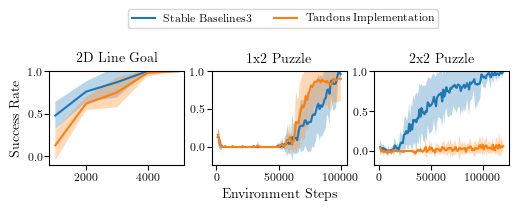

In [23]:
x = np.load(path_stable_2DGoal[0], mmap_mode='r')["timesteps"]
idx = np.where(x <= 50000)
x = x[idx]
fig, ax = plt.subplots(1, 3, figsize=(TEXTWIDTH +0.15, (TEXTWIDTH + 0.15) * (5**.5 - 1.) / (2*3)))
######################################################################################
# 2D Line Goal ###
##################
#ax[0, 0].set_ylim(top=100)
#ax[0, 0].plot(x, mean_return_stable_ri025, label="Stable Baselines3")
#ax[0, 0].fill_between(x, mean_return_stable_ri025 + std_return_stable_ri025, mean_return_stable_ri025 - std_return_stable_ri025, alpha=0.3)
#ax[0, 0].plot(x, mean_return_tandon, label="Tandons Implementation")
#ax[0, 0].fill_between(x, mean_return_tandon + std_return_tandon, mean_return_tandon - std_return_tandon, alpha=0.3)
#ax[0, 0].set_ylim(top=100)

ax[0].plot(x, mean_succ_stable_ri025, label="Stable Baselines3")
ax[0].fill_between(x, mean_succ_stable_ri025 + std_succ_stable_ri025, mean_succ_stable_ri025 - std_succ_stable_ri025, alpha=0.3)
ax[0].plot(x, mean_succ_tandon, label="Tandons Implementation")
ax[0].fill_between(x, mean_succ_tandon + std_succ_tandon, mean_succ_tandon - std_succ_tandon, alpha=0.3)
ax[0].set_ylim(top=1.)
ax[0].set_title("2D Line Goal")

######################################################################################
# 1x2 puzzle #####
##################

x = np.load(path_stable_1x2[0], mmap_mode='r')["timesteps"]
idx = np.where(x <= 100000)
x = x[idx]

returns_stable, succ_stable = gather_data(path_stable_1x2, x, idx)
returns_tandon, succ_tandon = gather_data(path_tandon_1x2, x, idx)

mean_return_stable, std_return_stable = compute_mean_std(returns_stable)
mean_succ_stable, std_succ_stable = compute_mean_std(succ_stable)

mean_return_tandon, std_return_tandon = compute_mean_std(returns_tandon)
mean_succ_tandon, std_succ_tandon = compute_mean_std(succ_tandon)

#ax[0, 1].plot(x, mean_return_stable, label="Stable Baselines3")
#ax[0, 1].fill_between(x, mean_return_stable + std_return_stable, mean_return_stable - std_return_stable, alpha=0.3)
#ax[0, 1].plot(x, mean_return_tandon, label="Tandons Implementation")
#ax[0, 1].fill_between(x, mean_return_tandon + std_return_tandon, mean_return_tandon - std_return_tandon, alpha=0.3)
#ax[0, 1].set_ylim(top=100)


ax[1].plot(x, mean_succ_stable, label="Stable Baselines3")
ax[1].fill_between(x, mean_succ_stable + std_succ_stable, mean_succ_stable - std_succ_stable, alpha=0.3)
ax[1].plot(x, mean_succ_tandon, label="Tandons Implementation")
ax[1].fill_between(x, mean_succ_tandon + std_succ_tandon, mean_succ_tandon - std_succ_tandon, alpha=0.3)
ax[1].set_ylim(top=1.)
ax[1].set_title("1x2 Puzzle")

######################################################################################
# 2x2 puzzle #####
##################

x = np.load(path_stable_2x2[0], mmap_mode='r')["timesteps"]
idx = np.where(x <= 120000)
x = x[idx]

returns_stable, succ_stable = gather_data(path_stable_2x2, x, idx)
returns_tandon, succ_tandon = gather_data(path_tandon_2x2, x, idx)

mean_return_stable, std_return_stable = compute_mean_std(returns_stable)
mean_succ_stable, std_succ_stable = compute_mean_std(succ_stable)

mean_return_tandon, std_return_tandon = compute_mean_std(returns_tandon)
mean_succ_tandon, std_succ_tandon = compute_mean_std(succ_tandon)

#ax[0, 2].plot(x, mean_return_stable, label="Stable Baselines3")
#ax[0, 2].fill_between(x, mean_return_stable + std_return_stable, mean_return_stable - std_return_stable, alpha=0.3)
#ax[0, 2].plot(x, mean_return_tandon, label="Tandons Implementation")
#ax[0, 2].fill_between(x, mean_return_tandon + std_return_tandon, mean_return_tandon - std_return_tandon, alpha=0.3)
#ax[0, 2].set_ylim(top=100)


ax[2].plot(x, mean_succ_stable, label="Stable Baselines3")
ax[2].fill_between(x, mean_succ_stable + std_succ_stable, mean_succ_stable - std_succ_stable, alpha=0.3)
ax[2].plot(x, mean_succ_tandon, label="Tandons Implementation")
ax[2].fill_between(x, mean_succ_tandon + std_succ_tandon, mean_succ_tandon - std_succ_tandon, alpha=0.3)
ax[2].set_ylim(top=1.)
ax[2].set_title("2x2 Puzzle")

#ax[0].set_xticklabels([])
#ax[1].set_xticklabels([])
#ax[2].set_xticklabels([])

for i in range(3):
        ax[i].locator_params(axis='y', nbins=3)

ax[1].set_xlabel('Environment Steps')
#ax[0, 0].set_ylabel('Average Return')
ax[0].set_ylabel('Success Rate')
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, ncol=2, bbox_to_anchor=(0.79,1.43))
plt.savefig("Comparison.pdf",
            bbox_inches='tight', dpi=plt.gcf().dpi)#,
            #dpi=1000)
plt.show()

Every 1000 environment steps, we evaluated for 10 episodes and averaged the returns and success rate over them. We did 10 runs like this. In bold, we can see the mean of those runs. The shaded areas visualize the standard deviation. During training, we terminated an episode on change of symbolic state. However, during evaluation we did not do so but ended every episode after 100 steps. This way we can see via the return how long the actor took to reach the goal state in an episode.

Difference in starting to see Increase in success for 1x2 and 2x2 puzzle -> Boarders are the same for both puzzles. Thus, in the bigger puzzle there is less free space. In the small puzzle there is much exploration in the beginning. Because, there is a lot of free space agent has many episodes of exploration, where it does not get any reward in training, such that it does not learn much in the beginning. We observed that for Tandons implementation the policy seems to converge quicker and explores the space less well, leading to the poor performance in the 2x2 puzzle.

# **Comparison of FM Implementzations**

In [25]:
simple_path = ["fm/fm_eval_empty_input_4skills_seed12345.npz", "fm/fm_eval_empty_input_24skills_seed12345.npz"]
symstate_path = ["fm/fm_eval_sym_input_4skills_seed12345.npz", "fm/fm_eval_sym_input_24skills_seed12345.npz"]
lookup_path = ["fm_eval/fm_eval_lookup_4.npz", "fm_eval/fm_eval_lookup_24.npz"]

In [26]:
data_simple_4skills = np.load(simple_path[0], mmap_mode='r')
data_simple_24skills = np.load(simple_path[1], mmap_mode='r')
for k in data_simple_4skills.files:
    print(k, data_simple_4skills[k])
    
data_sym_4skills = np.load(symstate_path[0], mmap_mode='r')
data_sym_24skills = np.load(symstate_path[1], mmap_mode='r')
for k in data_sym_4skills.files:
    print(k, data_sym_4skills[k])

data_lookup_4skills = np.load(lookup_path[0], mmap_mode='r')
data_lookup_24skills = np.load(lookup_path[1], mmap_mode='r')

train_loss [2.1749146  2.18660498 2.20363808 2.15695906 2.15156746 2.1709075
 2.09085751 2.09738588 2.21566772 2.07745123 2.10725117 2.03729224
 1.94048071 1.85870957 1.90947485 2.06289697 2.00462055 2.08532023
 1.95905042 1.98175216 1.83530235 1.97434819 1.93229198 1.75311053
 2.06597257 1.87008476 1.73970103 1.71883035 1.7609483  1.7828716
 1.59507847 1.7232703  1.75089347 1.78456092 1.42239332 1.47933269
 1.70598006 1.8903048  1.50373769 1.56591332 1.63656473 1.42426801
 1.9479624  1.77804446 1.21631205 1.26309741 1.38516247 1.66352701
 1.62913203 1.12613201 1.1477766  1.28686857 1.3684504  1.30011678
 0.98755729 1.10323071 1.06006098 1.00345135 1.43636048 1.2748574
 1.61326981 0.85450709 1.3048017  0.69752955 0.89346629 1.01346076
 0.66675931 0.95301616 0.69121492 0.76986408 0.63263637 1.07975709
 1.22175789 0.64350653 0.85463035 0.70591855 0.94490623 0.57603991
 0.96028996 0.62768686 0.55555445 0.91362071 0.50426757 0.50658613
 0.73603678 0.76244235 0.77027941 0.72912604 0.3839519

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

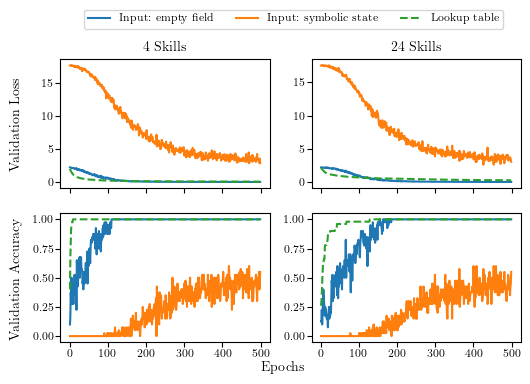

In [27]:
fig, ax = plt.subplots(2,2, sharex=True, figsize=(TEXTWIDTH +0.15, (TEXTWIDTH + 0.15) * (5**.5 - 1.) / (2)))

ax[0, 0].plot(np.arange(data_simple_4skills["test_loss"].shape[0]), data_simple_4skills["test_loss"], label="Input: empty field")
ax[0, 0].plot(np.arange(data_sym_4skills["test_loss"].shape[0]), data_sym_4skills["test_loss"], label="Input: symbolic state")
ax[0, 0].plot(np.arange(data_lookup_4skills["test_loss"].shape[0]), data_lookup_4skills["test_loss"], "--", label="Lookup table")

ax[1, 0].plot(np.arange(data_simple_4skills["test_acc"].shape[0]), data_simple_4skills["test_acc"], label="Input: empty field")
ax[1, 0].plot(np.arange(data_sym_4skills["test_acc"].shape[0]), data_sym_4skills["test_acc"], label="Input: symbolic state")
ax[1, 0].plot(np.arange(data_lookup_4skills["test_acc"].shape[0]), data_lookup_4skills["test_acc"], "--", label="Lookup table")
ax[0, 0].set_title("Multiple skill effects")

print(np.arange(data_sym_24skills["test_loss"].shape[0]))
ax[0, 1].plot(np.arange(data_simple_24skills["test_loss"].shape[0]), data_simple_24skills["test_loss"], label="Input:empty field")
ax[0, 1].plot(np.arange(data_sym_24skills["test_loss"].shape[0]), data_sym_24skills["test_loss"], label="Input: symbolic state")
ax[0, 1].plot(np.arange(data_lookup_24skills["test_loss"].shape[0]), data_lookup_24skills["test_loss"], "--", label="Lookup table")

ax[1, 1].plot(np.arange(data_simple_24skills["test_acc"].shape[0]), data_simple_24skills["test_acc"], label="Input: empty field")
ax[1, 1].plot(np.arange(data_sym_24skills["test_acc"].shape[0]), data_sym_24skills["test_acc"], label="Input: symbolic state")
ax[1, 1].plot(np.arange(data_lookup_24skills["test_acc"].shape[0]), data_lookup_24skills["test_acc"], "--", label="Lookup table")
ax[0, 1].set_title("Single skill effect")

fig.text(0.5, 0.03, 'Epochs', ha='center')
fig.text(0.04, 0.28, 'Validation Accuracy', va='center', rotation='vertical')
fig.text(0.04, 0.7, 'Validation Loss', va='center', rotation='vertical')

ax[0, 0].set_title("4 Skills")
ax[0, 1].set_title("24 Skills")

handles, labels = ax[1, 1].get_legend_handles_labels()
fig.legend(handles, labels, ncol=3, bbox_to_anchor=(0.88,1.03))
plt.savefig("Fm_Comparison.pdf",
            bbox_inches='tight', dpi=plt.gcf().dpi)
plt.show()


In [ ]:
# plot perforamnce of fm with sym input dependent on batch size
plt.subplots()

# **Relabeling**

In [101]:
path_2x3_relabel = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints/parallel2x3_num_skills3_sparseTrue_relabelingTrue/evaluations.npz"]

path_2x3 = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints/parallel2x3_num_skills3_sparseTrue_relabelingFalse/evaluations.npz"]

In [108]:
x = np.load(path_2x3_relabel[0], mmap_mode='r')["timesteps"]
idx = np.where(x <= 490000)
x = x[idx]

returns_relabel, succ_relabel = gather_data(path_2x3_relabel, x, idx)
returns, succ = gather_data(path_2x3, x, idx)

mean_succ_relabel, std_succ_relabel = compute_mean_std(succ_relabel)
mean_succ, std_succ = compute_mean_std(succ)

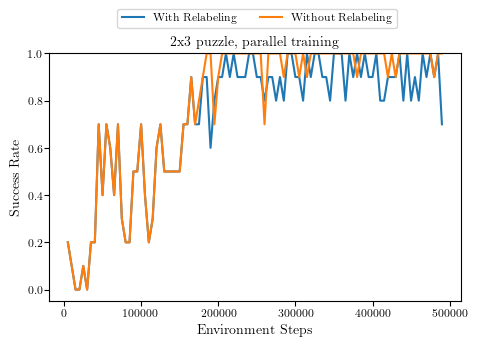

In [109]:
fig, ax = plt.subplots(1, 1, figsize=(0.9 * TEXTWIDTH +0.1, 0.9 * TEXTWIDTH * (5**.5 - 1) / 2))

ax.plot(x, mean_succ_relabel, label="With Relabeling")
ax.fill_between(x, mean_succ_relabel + std_succ_relabel, mean_succ_relabel - std_succ_relabel, alpha=0.3)

ax.plot(x, mean_succ, label="Without Relabeling")
ax.fill_between(x, mean_succ + std_succ, mean_succ - std_succ, alpha=0.3)

ax.set_ylim(top=1.)
ax.set_title("2x3 puzzle, parallel training")

#ax[0, 0].set_xticklabels([])

#for i in range(2):
#    for j in range(3):
#        ax.locator_params(axis='y', nbins=3)

ax.set_xlabel('Environment Steps')
ax.set_ylabel('Success Rate')
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, ncol=2, bbox_to_anchor=(0.79,1.035))
#plt.savefig(".pdf",
#            bbox_inches='tight', dpi=plt.gcf().dpi)#,
#            #dpi=1000)
plt.show()